## Data Preprocessing & Labelling

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### Understanding the Data

In [ ]:
print(f"There is {df.shape[0]} rows and {df.shape[1]} columns")

There is 113937 rows and 81 columns


Hence it's big dataset containg 113937 rows with 81 features.

In [ ]:
# let's check the formats of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

As you can see data type are formated but i can see there is alot of missing values in some features. So we deal with those missing value during our EDA process.

In [ ]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [ ]:
# checking total null values
df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [ ]:
# checking the percentage of null value
null_val = df.isnull().sum()
total_rows = len(df)

null_percentage = ((null_val/total_rows)*100).sort_values(ascending=False)
print(null_percentage)

GroupKey                         88.290898
LoanFirstDefaultedCycleNumber    85.121602
ScorexChangeAtTimeOfListing      83.387311
ProsperPrincipalOutstanding      80.616481
ProsperPrincipalBorrowed         80.616481
                                   ...    
IncomeRange                       0.000000
IncomeVerifiable                  0.000000
StatedMonthlyIncome               0.000000
LoanKey                           0.000000
Investors                         0.000000
Length: 81, dtype: float64


<Axes: >

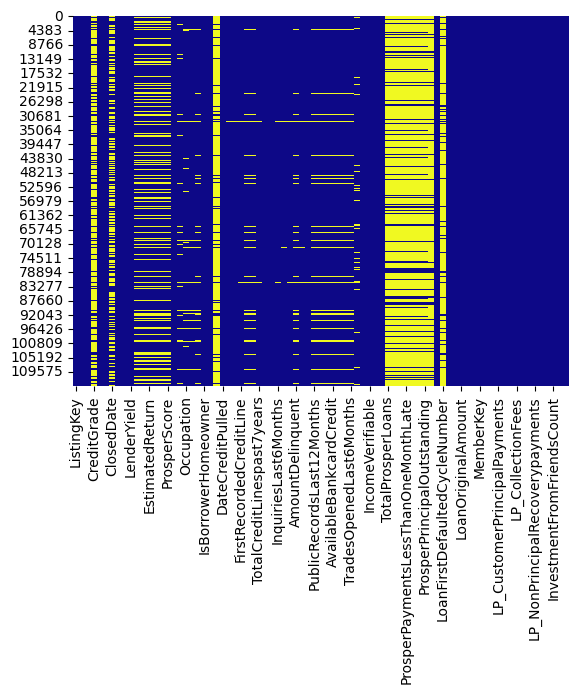

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='plasma')

### Data Cleaing

In [ ]:
df.shape

(113937, 81)

In [ ]:
# Duplicates data entry in loan data
df.duplicated().sum()

0

In [ ]:
#checking the loan status
df['LoanStatus'].value_counts(dropna=False)

LoanStatus
Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

From the feature descriptions, it looks like Prosper transitioned to a "Prosper Rating" after 2009 to differentiate themselves from the industry standard "Credit Grade.

For exploratory purposes, we'll replace the Credit Grade of No Credit (NC) with High Risk (HR) and combine this column with the Prosper Rating.

In [ ]:
# fill NA with empty strings

df['CreditGrade'].replace(['NC', 'HR'], inplace = True)
df['ProsperRating (Alpha)'].fillna("", inplace = True)
df['CreditGrade'].fillna("", inplace = True)
# combine credit ratings
df['ProsperRatingCombined'] = df['ProsperRating (Alpha)'] + df['CreditGrade']

df = df.query(' ProsperRatingCombined != ""')
df['ProsperRatingCombined'].value_counts()

df.drop(['ProsperRating (numeric)'], axis =1, inplace = True)
df.drop(['ProsperRating (Alpha)'], axis =1, inplace = True)
df.drop(['CreditGrade'], axis = 1 , inplace = True)

<ipython-input-14-40c0b2322b9d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['ProsperRating (numeric)'], axis =1, inplace = True)
<ipython-input-14-40c0b2322b9d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['ProsperRating (Alpha)'], axis =1, inplace = True)
<ipython-input-14-40c0b2322b9d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['CreditGrade'], axis = 1 , inplace = True)


About 20 loans are missing an APR value. Because APR is equal to the borrower rate + fees, let's calculate the median difference between the two, and add that value to the borrower rate of our data points missing an APR.

In [ ]:
borrower_fees = df["BorrowerAPR"] - df["BorrowerRate"]
borrower_fees.median()

0.025380000000000014

In [ ]:
df["BorrowerAPR"].fillna(df["BorrowerRate"] + borrower_fees.median(), inplace=True)

df["BorrowerAPR"].isnull().sum()

0

EstimatedEffectiveYield will always be the borrower rate minus some expected loss from interest charge-offs and fees.

In [ ]:
estimated_loss_from_fees = df["BorrowerRate"] - df["EstimatedEffectiveYield"]
estimated_loss_from_fees.median()

0.01915

In [ ]:
df["EstimatedEffectiveYield"].fillna(df["BorrowerRate"] - estimated_loss_from_fees.median(), inplace=True)

df["EstimatedEffectiveYield"].isnull().sum()

0

EstimatedLoss is harder to gauge. Let's just take the median.

In [ ]:
df["EstimatedLoss"].fillna(df["EstimatedLoss"].median(), inplace=True)

df["EstimatedLoss"].isnull().sum()

0

EstimatedReturn is defined as EstimatedEffectiveYield - EstimatedLoss.

In [ ]:
df["EstimatedReturn"].fillna(df["EstimatedEffectiveYield"] - df["EstimatedLoss"], inplace=True)

df["EstimatedReturn"].isnull().sum()

0

The numeric ProsperScore NaNs can be replaced with median values.

In [ ]:
df["ProsperScore"].fillna(df["ProsperScore"].median(), inplace=True)

df["ProsperScore"].isnull().sum()

0

There are a host of variables that are very important for our fututre analysis but are only missing a relatively small number of values.Let's drop all the rows missing values for these, rather than filling them out with arbitrary median values or 0s.

In [ ]:
df.shape

(110997, 79)

In [ ]:
df.dropna(subset=["EmploymentStatusDuration", "CreditScoreRangeLower", "FirstRecordedCreditLine", "CurrentCreditLines",
                 "TotalCreditLinespast7years"], inplace=True)
df.shape

(104702, 79)

In [ ]:
df.isna().sum()

ListingKey                     0
ListingNumber                  0
ListingCreationDate            0
Term                           0
LoanStatus                     0
                              ..
Recommendations                0
InvestmentFromFriendsCount     0
InvestmentFromFriendsAmount    0
Investors                      0
ProsperRatingCombined          0
Length: 79, dtype: int64

In [ ]:
#Calculate DebtToIncomeRatio for unverifiable incomes, adding $1 to account for $0/month incomes
df["DebtToIncomeRatio"].fillna(df["MonthlyLoanPayment"] / (df["StatedMonthlyIncome"] + 1), inplace = True)

df["DebtToIncomeRatio"].isnull().sum()

0

Data dealing with the debtor's Prosper history, which we can fill with 0s to represent a lack of such history.

In [ ]:
prosper_vars = ["TotalProsperLoans","TotalProsperPaymentsBilled", "OnTimeProsperPayments", "ProsperPaymentsLessThanOneMonthLate",
               "ProsperPaymentsOneMonthPlusLate", "ProsperPrincipalBorrowed", "ProsperPrincipalOutstanding"]

df[prosper_vars] = df[prosper_vars].fillna(0)

df.isnull().sum()

ListingKey                     0
ListingNumber                  0
ListingCreationDate            0
Term                           0
LoanStatus                     0
                              ..
Recommendations                0
InvestmentFromFriendsCount     0
InvestmentFromFriendsAmount    0
Investors                      0
ProsperRatingCombined          0
Length: 79, dtype: int64

In [ ]:
df["LoanStatus"] = df["ClosedDate"].apply(lambda x: 1 if pd.isnull(x) else 0)
df["LoanStatus"] = df["LoanCurrentDaysDelinquent"].apply(lambda x: 1 if x>180 else 0)
df['LoanStatus'].value_counts(dropna=False)

LoanStatus
0    93001
1    11701
Name: count, dtype: int64

In [ ]:
df['Occupation'].fillna('Other', inplace = True)

Here 1 denotes that the borrower has defaulted and 0 means that he has not defaulted.

In [ ]:
#handling the remaining missing values
categorical = df.select_dtypes(include=["object"]).columns.values
df[categorical] = df[categorical].fillna("Unknown")

df.select_dtypes(exclude=[np.number]).isnull().sum()

ListingKey                 0
ListingCreationDate        0
ClosedDate                 0
BorrowerState              0
Occupation                 0
EmploymentStatus           0
IsBorrowerHomeowner        0
CurrentlyInGroup           0
GroupKey                   0
DateCreditPulled           0
FirstRecordedCreditLine    0
IncomeRange                0
IncomeVerifiable           0
LoanKey                    0
LoanOriginationDate        0
LoanOriginationQuarter     0
MemberKey                  0
ProsperRatingCombined      0
dtype: int64

In [ ]:
continuous = df.select_dtypes(include=["number"]).columns
for column in continuous:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

In [ ]:
df['IncomeRange'].fillna('$0')

0         $25,000-49,999
1         $50,000-74,999
3         $25,000-49,999
4              $100,000+
5              $100,000+
               ...      
113932    $50,000-74,999
113933    $75,000-99,999
113934    $25,000-49,999
113935    $25,000-49,999
113936    $50,000-74,999
Name: IncomeRange, Length: 104702, dtype: object

In [ ]:
df.StatedMonthlyIncome = df.StatedMonthlyIncome.round()

In [ ]:
df[continuous].describe()

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.047020e+05,104702.000000,104702.000000,104702.000000,104702.000000,104702.000000,104702.000000,104702.000000,104702.000000,104702.000000,...,104702.000000,104702.000000,104702.000000,104702.000000,104702.000000,104702.000000,104702.000000,104702.000000,104702.000000,104702.000000
mean,6.759654e+05,41.256060,0.111755,0.219373,0.192005,0.181936,0.166207,0.078804,0.093648,5.959514,...,-57.151195,-13.625766,642.533090,624.465631,22.973502,0.998458,0.048509,0.023352,16.082052,81.982111
std,2.963832e+05,10.782749,0.315067,0.080634,0.074759,0.074555,0.069507,0.042208,0.042202,2.139305,...,62.000349,105.967230,2343.169287,2311.542627,261.592828,0.018687,0.338299,0.236131,295.210688,105.349027
min,9.827900e+04,12.000000,0.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,...,-664.870000,-6221.320000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.785028e+05,36.000000,0.000000,0.156290,0.133400,0.123400,0.114413,0.049900,0.069700,4.000000,...,-77.380000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,6.312570e+05,36.000000,0.000000,0.209690,0.182000,0.171900,0.156300,0.072400,0.089760,6.000000,...,-36.970000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,45.000000
75%,9.229895e+05,36.000000,0.000000,0.284820,0.250000,0.239900,0.217300,0.100000,0.117300,7.000000,...,-15.410000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,119.000000
max,1.255725e+06,60.000000,1.000000,0.423950,0.360000,0.340000,0.340850,0.366000,0.283700,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,13605.350000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [ ]:
## Converting Loan Date from String to datetime64
df['LoanOriginationDate'] = df['LoanOriginationDate'].astype('datetime64[ns]')
# Extracting Year in which Loan Originated
df['LoanOriginationYear'] = pd.DatetimeIndex(df['LoanOriginationDate']).year
# Extracting Month in which Loan Originated
#df['LoanOriginationMonth'] = pd.DatetimeIndex(df['LoanOriginationDate']).month_name() # need not include in our analysis since we already have 'LoanMonthsSinceOrigination'

df.drop(['LoanOriginationDate'], axis =1, inplace = True)

In [ ]:
# change the values of listing category (numeric)
Listing_alpha = ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use',
                 'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans',
                 'Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes',
                 'Vacation', 'Wedding Loans']
Listing_num = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

df['ListingCategory (numeric)'] = df['ListingCategory (numeric)'].replace(Listing_num, Listing_alpha)

In [ ]:
# convert Prosper Score, Prosper Score Alpha, Loan Original Month, Year, Income Range into ordered categorical types
ordinal_var_dict = {'ProsperScore': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                    'ProsperRatingCombined': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA' ],
                    'LoanOriginationYear': [2009, 2010, 2011, 2012, 2013, 2014],
                    'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [ ]:
mode_value = df['LoanOriginationYear'].mode()[0]
df['LoanOriginationYear'].fillna(mode_value, inplace=True)

df['LoanOriginationYear']

0         2013
1         2014
3         2012
4         2013
5         2013
          ... 
113932    2013
113933    2011
113934    2013
113935    2011
113936    2014
Name: LoanOriginationYear, Length: 104702, dtype: category
Categories (6, int64): [2009 < 2010 < 2011 < 2012 < 2013 < 2014]

In [ ]:
df['IncomeRange'].fillna("$0", inplace = True)

<Axes: >

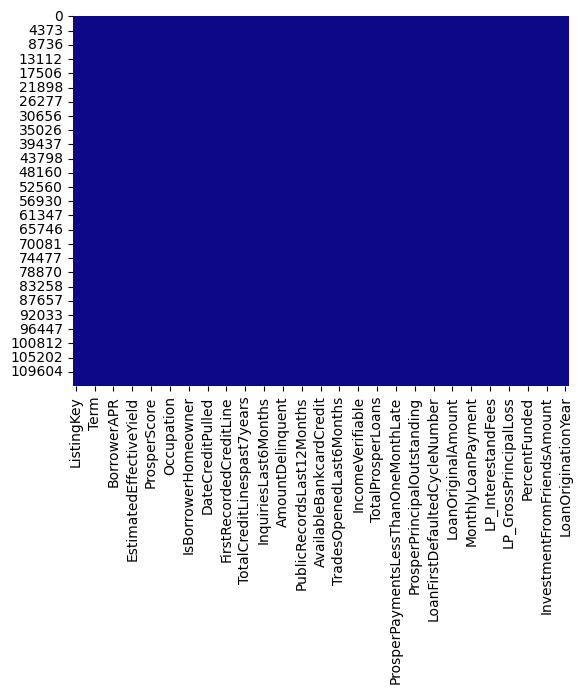

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cbar=False,cmap='plasma')

### Exploratory Data Analysis

I'm curious to find out which occupations have the highest instances of borrowing money. To explore this, I'll analyze the "Occupation" variable. Creating a bar chart will allow us to visualize the count of each occupation category effectively.

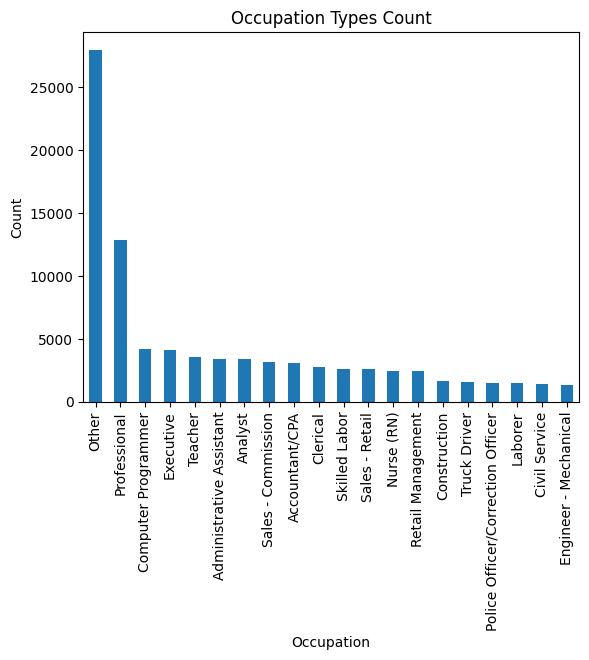

In [ ]:
# Ocupation bar plot
df.Occupation.value_counts().head(20).plot(kind = 'bar');
plt.xlabel('Occupation')
plt.ylabel('Count');
plt.title('Occupation Types Count');

Based on the available data most of the borrower's occupations has been listed as Other. However after that it can be observed that the most common 3 occupations are:

1. Professional
2. Computer Programmer
3. Executive

**Distribution of Prosper Scores**

<ipython-input-41-0419e8b60d25>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ProsperScore', data=df, palette='OrRd')


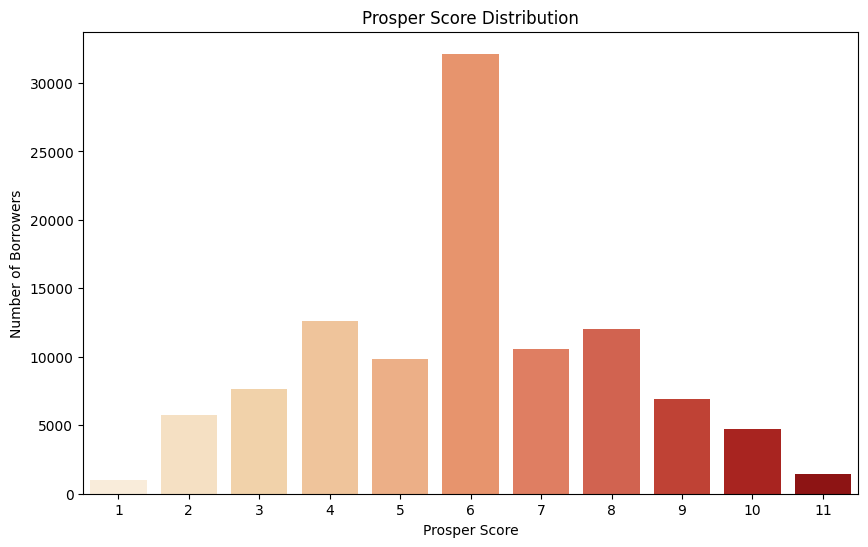

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='ProsperScore', data=df, palette='OrRd')
plt.title('Prosper Score Distribution')
plt.xlabel('Prosper Score')
plt.ylabel('Number of Borrowers')
plt.show()

The Prosper Score ranges from 1 - 11. The Prosper Score of 6 was the most commonly occuring prosper score in the dataset. The extremely high frequency of a Proser Score of 6 can be because the missing values in this column were replaced with the mean of the existing data which is 6.

*Credit Score Distribution*

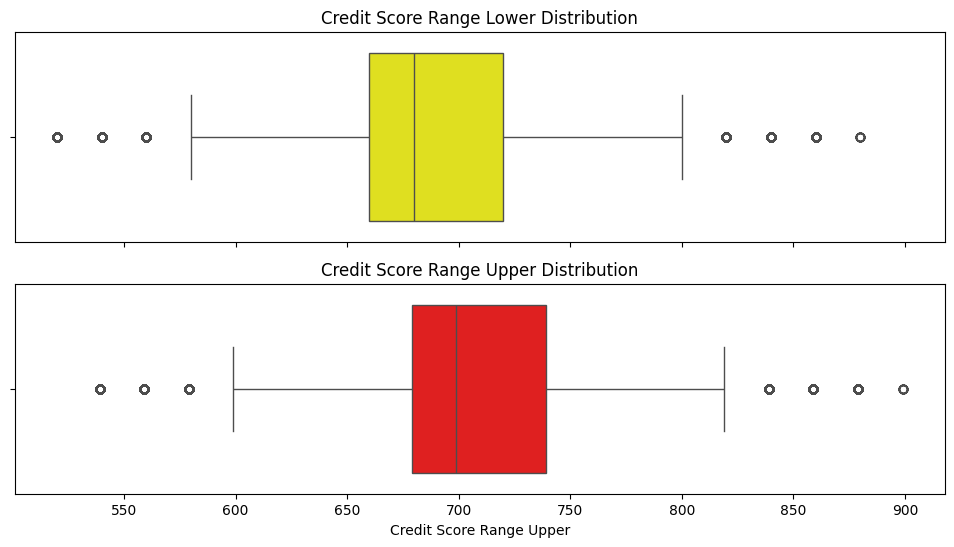

In [ ]:
f,(ax1,ax2) = plt.subplots(nrows=2, sharey=False, sharex=True,
                          figsize=(12,6))
sns.boxplot(x='CreditScoreRangeLower', data=df, color='yellow', ax=ax1)
ax1.set_title('Credit Score Range Lower Distribution')
ax1.set_xlabel('Credit Score Range Lower')
sns.boxplot(x='CreditScoreRangeUpper', data=df, color='red', ax=ax2)
ax2.set_title('Credit Score Range Upper Distribution')
ax2.set_xlabel('Credit Score Range Upper')
plt.show()

From the Box Plot, it can be seen that most of the borrowers have a Credit Score in the range of 650 - 750.
Outliers have also been identified, with the Credit Scores range below 600 and above 800.

*Distribution of Loan Amount*

<ipython-input-43-4e6269cedb74>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanOriginalAmount'], bins=50)


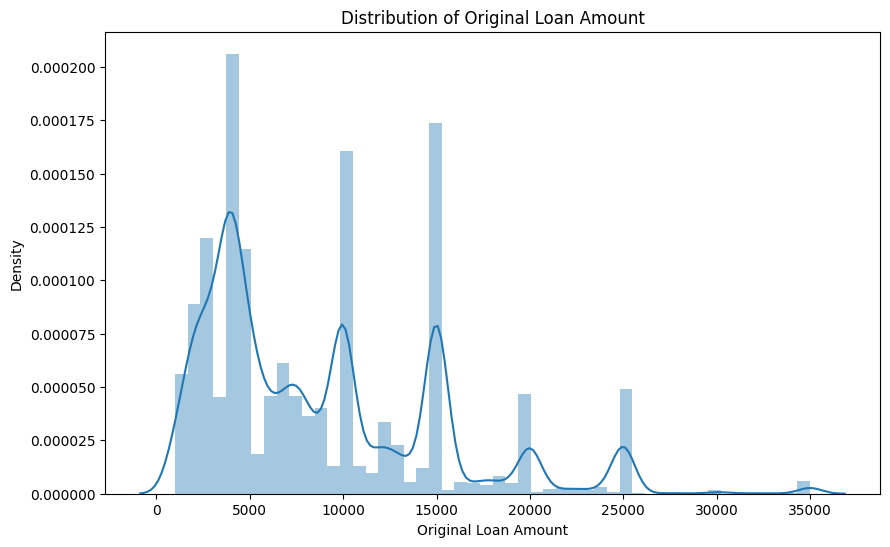

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.distplot(df['LoanOriginalAmount'], bins=50)
plt.title('Distribution of Original Loan Amount')
plt.xlabel('Original Loan Amount')
plt.show()

Most of the loans that were given, are between 2,000 - 15,000, with loans are of amount > 25,000 are extremely rarely given.
Additionally, loans of amount 10,000 and 15,000 also are very commonly issued.

*Distribution of the Monthly Loan Payments*

<ipython-input-44-5b28c4a5cce0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MonthlyLoanPayment'], bins=20)


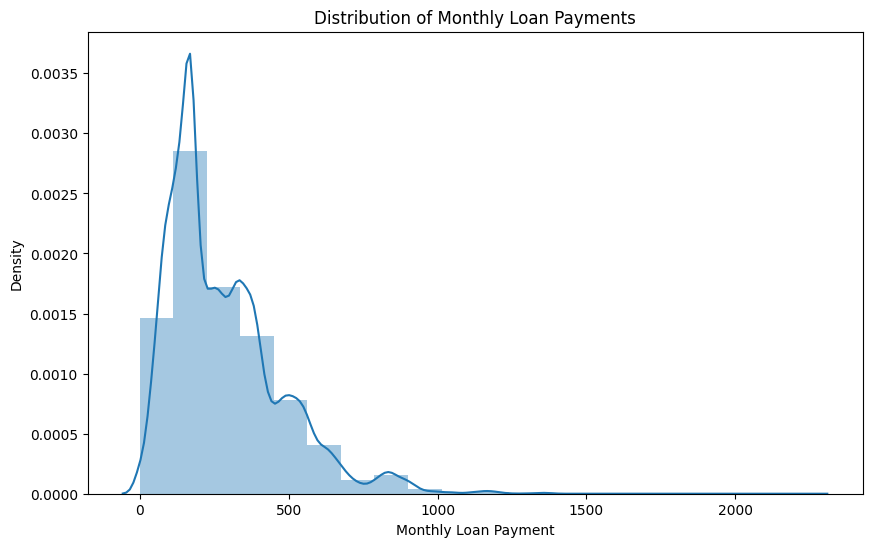

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.distplot(df['MonthlyLoanPayment'], bins=20)
plt.title('Distribution of Monthly Loan Payments')
plt.xlabel('Monthly Loan Payment')
plt.show()

Most of the loans in the dataset have Monthly Loan Payments below the amount of 500 a month.

*Most common duration for which Loans were taken*

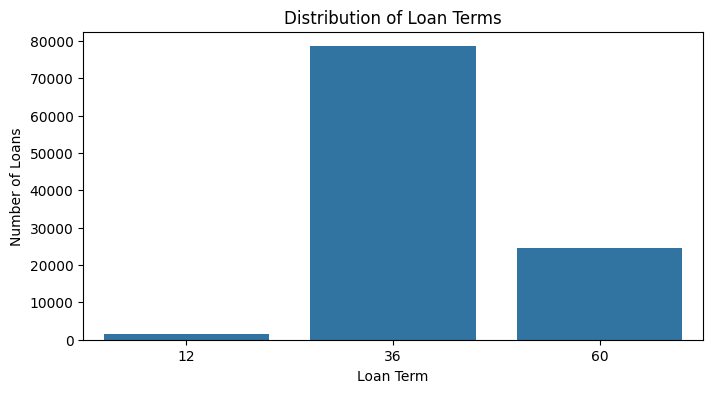

In [ ]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x='Term', data=df)
plt.title('Distribution of Loan Terms')
plt.xlabel('Loan Term')
plt.ylabel('Number of Loans')
plt.show()

Majority of the loans in the dataset are taken for a period of 36 Months/3 Years, with the loans for the duration of 12 Months being very rare. Also, a smaller portion of the loans are also given for a duration of 60 Months/5 Years.

**Distribution of Monthly Income of the Borrowers**

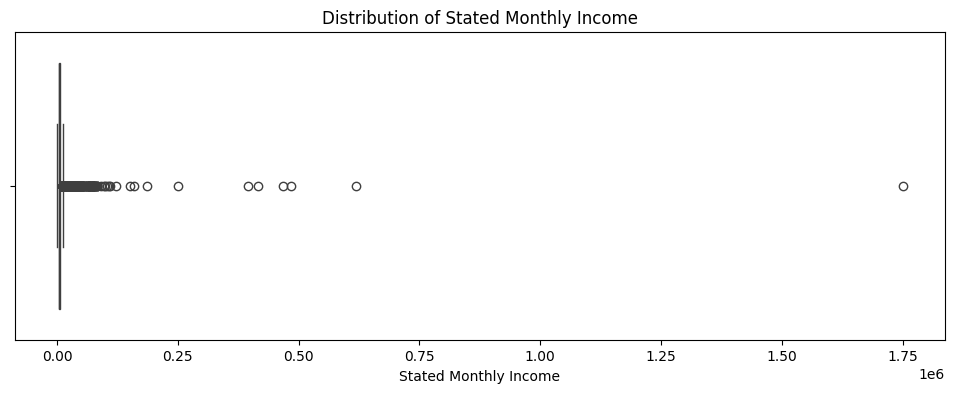

In [ ]:
fig = plt.figure(figsize=(12,4))
sns.boxplot(x='StatedMonthlyIncome', data=df)
plt.title('Distribution of Stated Monthly Income')
plt.xlabel('Stated Monthly Income')
plt.show()

The distribution cannot be clearly seen as there are many outliers in the income of the borrowers. It can be seen in the below distribution that monthly incomes above 10000 can be considered as outliers, and are thus removed from the dataset.
Most of the borrowers in the dataset have an income between 3000 and 6000.

*Year wise distribution of no. of loans*

<ipython-input-47-f6b21e0607c5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LoanOriginationYear', data=df, palette='OrRd')


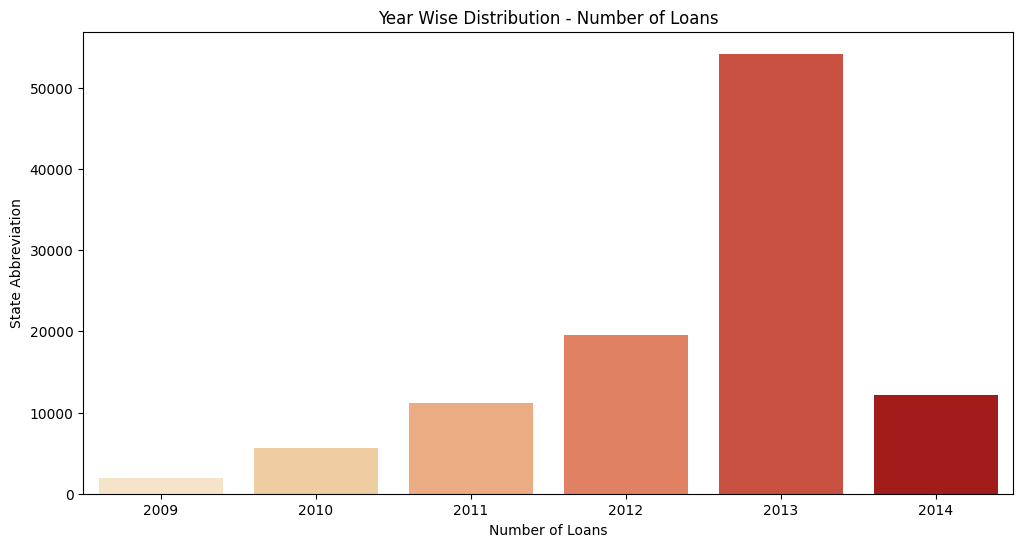

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x='LoanOriginationYear', data=df, palette='OrRd')
plt.title('Year Wise Distribution - Number of Loans')
plt.xlabel('Number of Loans')
plt.ylabel('State Abbreviation')
plt.show()

The highest number of loans were originated in the year of 2013, whereas the least number of loans originated in the year of 2005.
Additionally, it can also be seen that a positively increasing trend can be observed in the number of loan originations starting from the year 2009 to 2013, which peaked in 2013, and then the increase was interrupted. It can also be seen that the number of loans almost doubled every year in comparison to the previous year, for the year 2010 - 2013.

*No. of employed borrowers*

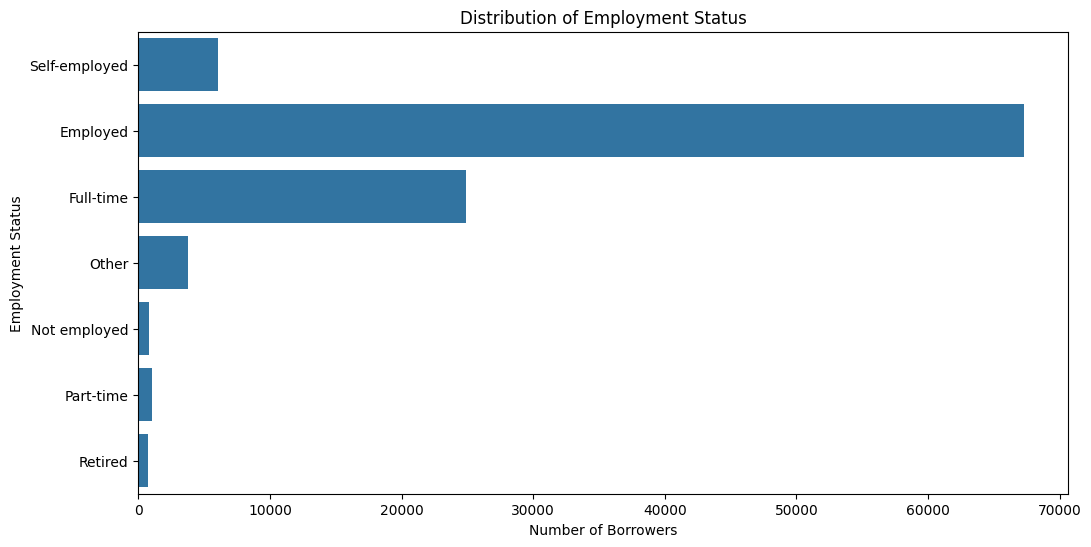

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.countplot(y='EmploymentStatus', data=df)
plt.title('Distribution of Employment Status')
plt.ylabel('Employment Status')
plt.xlabel('Number of Borrowers')
plt.show()

Most of the borrowers are Employed, with some of the borrowers being listed as Not Available and Other, whereas only a few of the borrowers were Not Employed.Also, some of the borrowers are also Retired.

*No.of borrowers with own home*

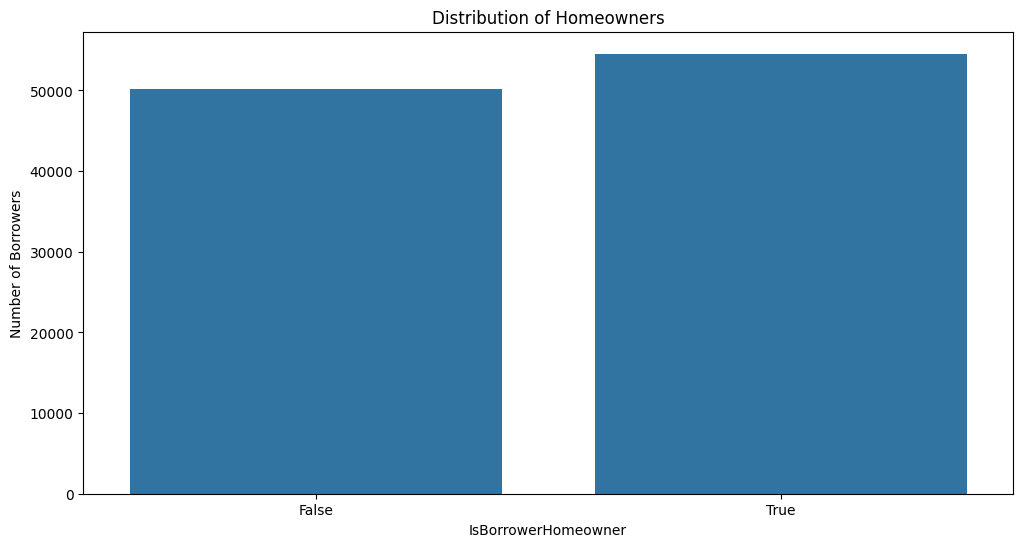

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x='IsBorrowerHomeowner', data=df)
plt.title('Distribution of Homeowners')
plt.ylabel('Number of Borrowers')
plt.show()

It can be seen that there is almost a 50-50 distribution of borrowers who own a home, i.e almost half the borrowers own a home, whereas the other half do not own a home.

**States with most and least number of borrowers**

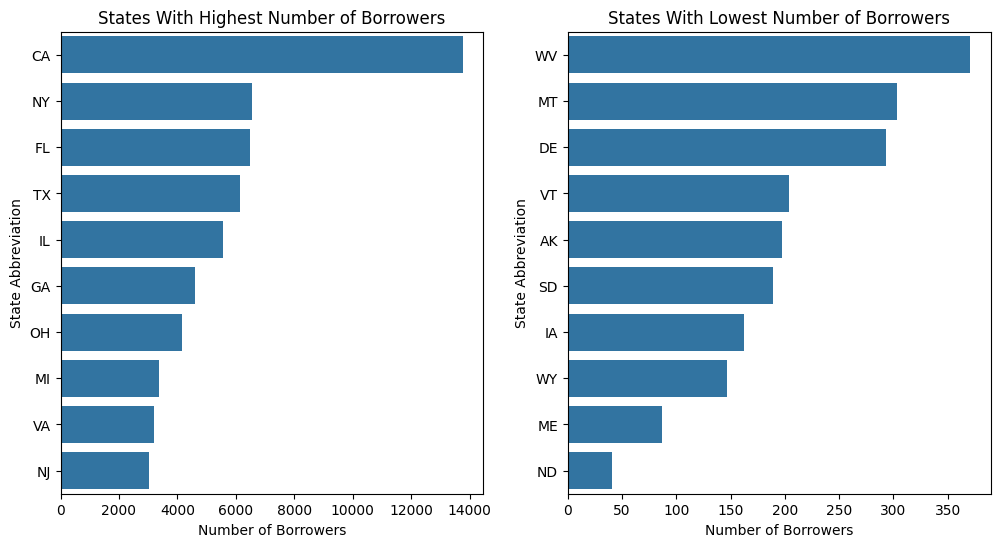

In [ ]:
most_state_list = df['BorrowerState'].value_counts()[:10].index.tolist()
most_state_count = df['BorrowerState'].value_counts()[:10].values.tolist()

least_state_list = df['BorrowerState'].value_counts()[-10:].index.tolist()
least_state_count = df['BorrowerState'].value_counts()[-10:].values.tolist()

f,(ax1,ax2) = plt.subplots(ncols=2, sharey=False, sharex=False,
                          figsize=(12,6))

sns.barplot(x=most_state_count, y=most_state_list, ax=ax1)
ax1.set_title('States With Highest Number of Borrowers')
ax1.set_xlabel('Number of Borrowers')
ax1.set_ylabel('State Abbreviation')

sns.barplot(x=least_state_count, y=least_state_list, ax=ax2)
ax2.set_title('States With Lowest Number of Borrowers')
ax2.set_xlabel('Number of Borrowers')
ax2.set_ylabel('State Abbreviation')
plt.show()

The state of California, is the state with the most number of borrowers, and California, Texas and New York are the top 3 states with the most number of borrowers.
The state of North Dakota is the state with the least number of borrowers, and Wyoming, Maine and North Dakota are the 3 states with the least number of borrowers.

*Most common reason for taking a loan*

<Axes: xlabel='count', ylabel='ListingCategory (numeric)'>

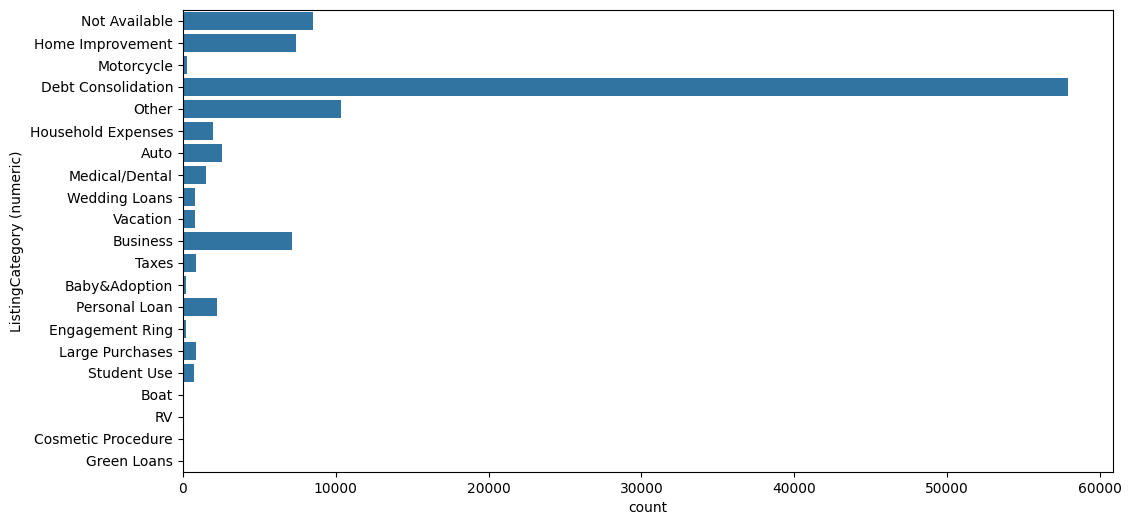

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.countplot(y='ListingCategory (numeric)', data=df)

It can be observed that, most of the loans were categorised as Debt Consolidation. Some of the most common categories of loans are:

1. Debt Consolidation
2. Home Improvement
3. Business
However, many loans were listed in the categories of Not Available and Other, thus making it difficult to determine accurately which was the most common reason for taking a loan.

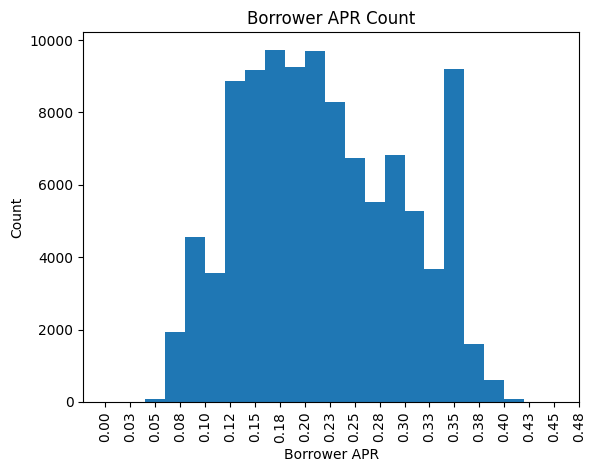

In [ ]:
# Borrower APR
ticks =list(np.arange(0, 0.5, 0.025))
labels = ['{:.2f}'.format(v) for v in ticks]
bins = np.arange(0, df['BorrowerAPR'].max()+.02, .02)
plt.hist(data = df, x = 'BorrowerAPR', bins = bins);
plt.xticks(ticks, labels);
plt.xticks(rotation = 90);
plt.xlabel('Borrower APR')
plt.ylabel('Count')
plt.title("Borrower APR Count");

In peer-to-peer (P2P) lending, the borrower's APR (Annual Percentage Rate) represents the total cost of borrowing money over a year. This includes the interest rate set by lenders on the platform,  but it can also factor in additional fees charged by the P2P platform itself. In this case the mean borrower APR around 0.20. One interesting thing is that lots of people have APR 0.35

Text(0.5, 1.0, 'Lender Yield Histogram')

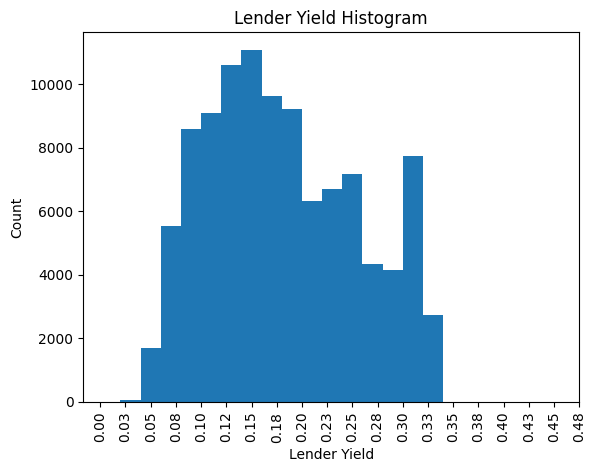

In [ ]:
# lender yield

ticks =list(np.arange(0, 0.5, 0.025))
labels = ['{:.2f}'.format(v) for v in ticks]
bins = np.arange(0, df['LenderYield'].max()+.02, .02)
plt.hist(data = df, x = 'LenderYield', bins = bins);
plt.xticks(ticks, labels);
plt.xticks(rotation = 90);
plt.xlabel('Lender Yield')
plt.ylabel('Count')
plt.title('Lender Yield Histogram')

Lender yield is normally distributed and this plot is quite similar to borrower APR.

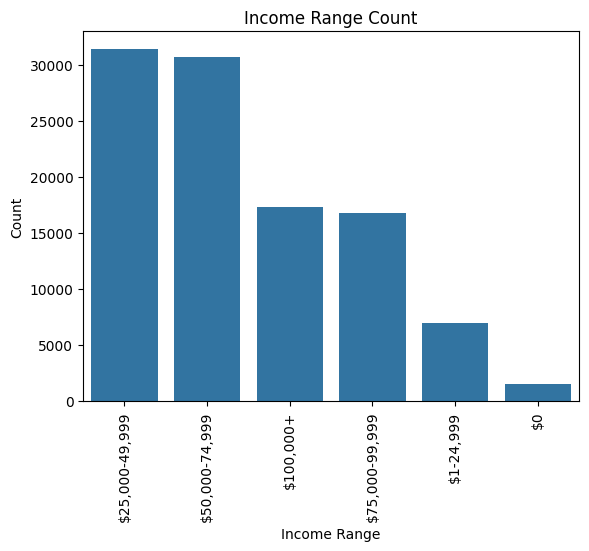

In [ ]:
type_order_income = df['IncomeRange'].value_counts().index
sns.countplot(data = df, x = 'IncomeRange', order  = type_order_income)
plt.xticks(rotation = 90);
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Income Range Count');

Majority of the borrowers have income in the range of $25000 - $75000

Text(0.5, 1.0, 'Debt To Income Ratio Count')

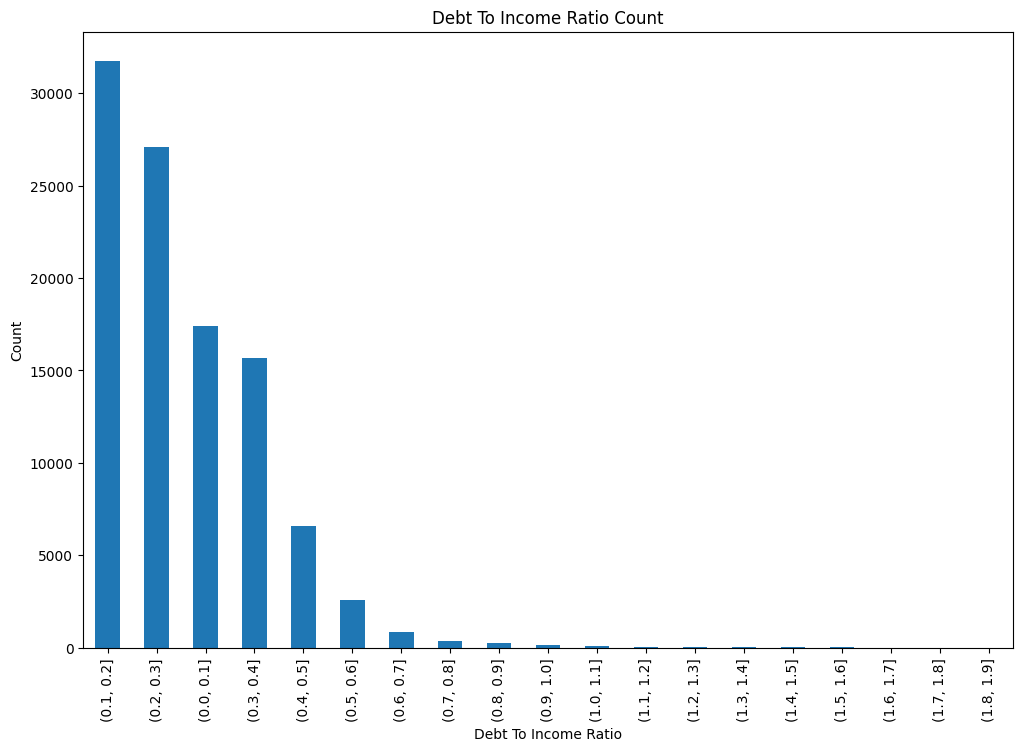

In [ ]:
# Debt To Income Ratio
ratio_bin = np.arange(0,2,0.1)
bins = pd.cut(df['DebtToIncomeRatio'], ratio_bin)
debt_ratio = pd.value_counts(bins)

plt.figure(figsize= (12,8))
debt_ratio.plot(kind = 'bar');
plt.xlabel('Debt To Income Ratio')
plt.ylabel('Count')
plt.title('Debt To Income Ratio Count')

In [ ]:
df['DebtToIncomeRatio'].describe()

count    104702.000000
mean          3.157172
std          34.389621
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max        1130.900000
Name: DebtToIncomeRatio, dtype: float64

Text(0.5, 1.0, 'Revolving Credit Balance Count')

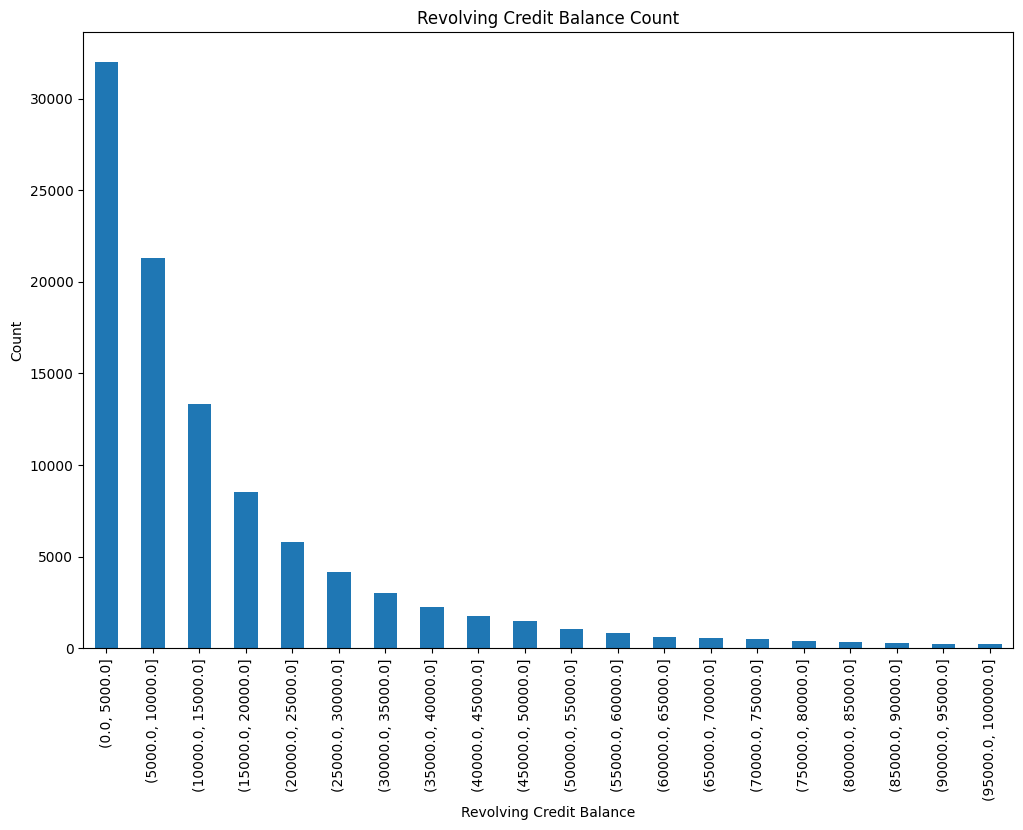

In [ ]:
# Revolving Credit Score

revol_bin = np.arange(0,df['RevolvingCreditBalance'].max(),5000)
bins = pd.cut(df['RevolvingCreditBalance'], revol_bin)
revol_balance = pd.value_counts(bins).head(20).sort_index()

plt.figure(figsize= (12,8))
revol_balance.plot(kind = 'bar');
plt.xlabel('Revolving Credit Balance')
plt.ylabel('Count')
plt.title('Revolving Credit Balance Count')

In [ ]:
df['RevolvingCreditBalance'].describe()

count    1.047020e+05
mean     1.780024e+04
std      3.310601e+04
min      0.000000e+00
25%      3.254000e+03
50%      8.708000e+03
75%      1.974700e+04
max      1.435667e+06
Name: RevolvingCreditBalance, dtype: float64

**Bivariate Analysis**

*Impact of Higher Income On Prosper Score ?*

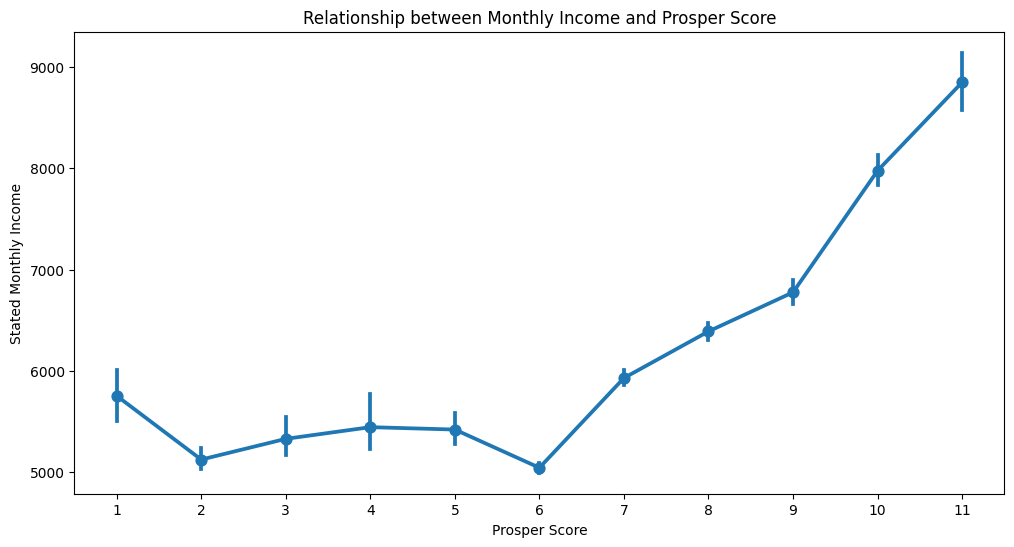

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.pointplot(y='StatedMonthlyIncome', x='ProsperScore', data=df)
plt.title('Relationship between Monthly Income and Prosper Score')
plt.xlabel('Prosper Score')
plt.ylabel('Stated Monthly Income')
plt.show()

It can be observed that there is Strong Positive Correlation between Monthly Income and Prosper Score. Higher the Monthly Income, Higher the Prosper Score.

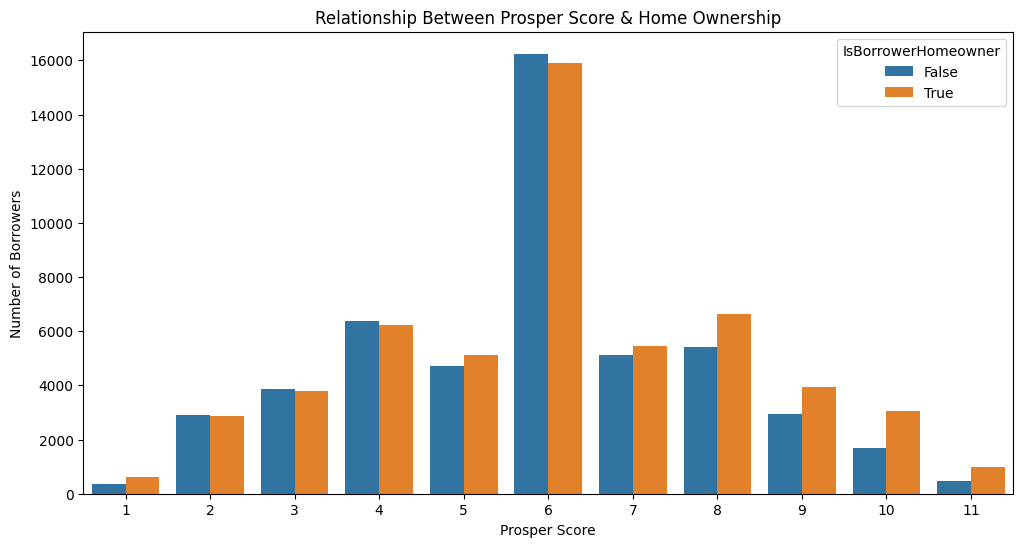

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.countplot(hue='IsBorrowerHomeowner', x='ProsperScore', data=df)
plt.title('Relationship Between Prosper Score & Home Ownership')
plt.ylabel('Number of Borrowers')
plt.xlabel('Prosper Score')
plt.show()

*Variation of Loan Amount based on different categories of loan*

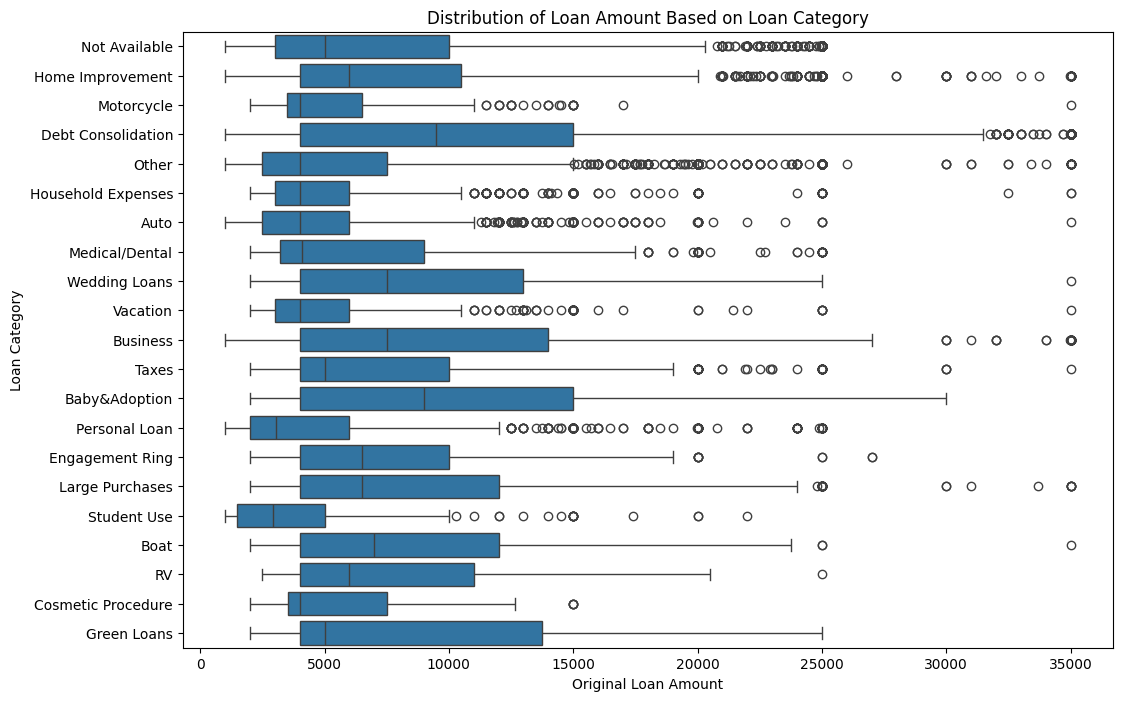

In [ ]:
fig = plt.figure(figsize=(12,8))
sns.boxplot(x='LoanOriginalAmount', y='ListingCategory (numeric)', data=df)
plt.title('Distribution of Loan Amount Based on Loan Category')
plt.ylabel('Loan Category')
plt.xlabel('Original Loan Amount')
plt.show()

*Effect of Employment Status on the Amount of Loan Taken ?*

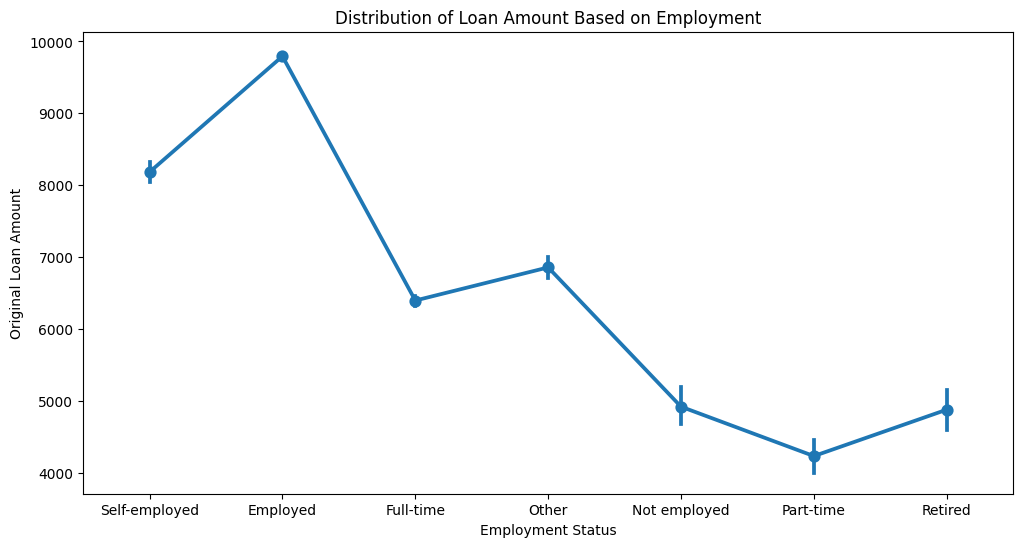

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.pointplot(y='LoanOriginalAmount', x='EmploymentStatus', data=df)
plt.title('Distribution of Loan Amount Based on Employment')
plt.xlabel('Employment Status')
plt.ylabel('Original Loan Amount')
plt.show()

It can be observed that the borrowers who are Employed, haves Loans of Higher Amounts when compared to borrowers with other categories of employment.
Whereas, borrowers who are Retired & Not Employed, have taken loans of Lower Amounts when compared with other Employment categories.

*Effect of Borrower's Employment on Loan Interest Rate ?*

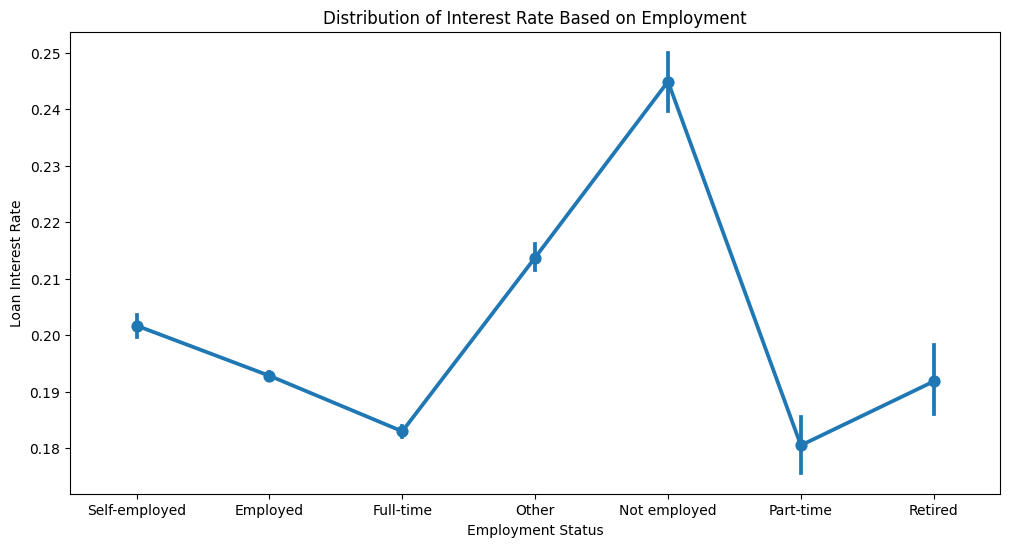

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.pointplot(y='BorrowerRate', x='EmploymentStatus', data=df)
plt.title('Distribution of Interest Rate Based on Employment')
plt.xlabel('Employment Status')
plt.ylabel('Loan Interest Rate')
plt.show()

A clear relationship can be observed between Employment Status and Loan Interest Rate. Borrower's who are Not Employed, have been charged the Highest Interest Rate, where borrowers who are Employed Full-Time/Part-Time are offered the minimum Interest Rate.

*Effect of Employment on a Higher Prosper Score ?*

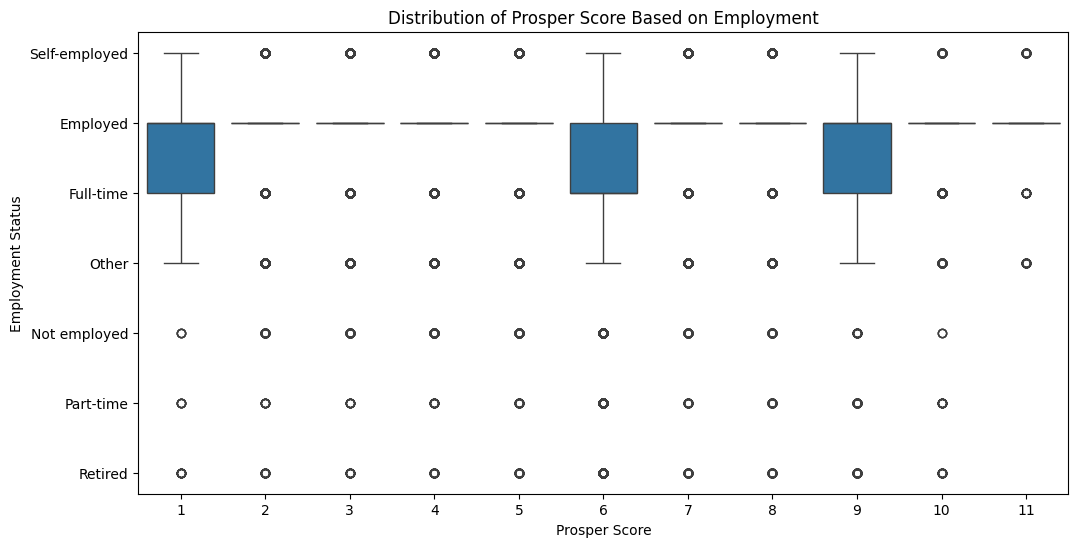

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.boxplot(x='ProsperScore', y='EmploymentStatus', data=df)
plt.title('Distribution of Prosper Score Based on Employment')
plt.ylabel('Employment Status')
plt.xlabel('Prosper Score')
plt.show()

It can be observed that most of the Borrowers who are Employed either Full Time/Part Time, have a higher range of Prosper Scores when compared to Borrowers who are Not Employed.

*Relationship between the Interest and Borrower's Prosper Score ?*

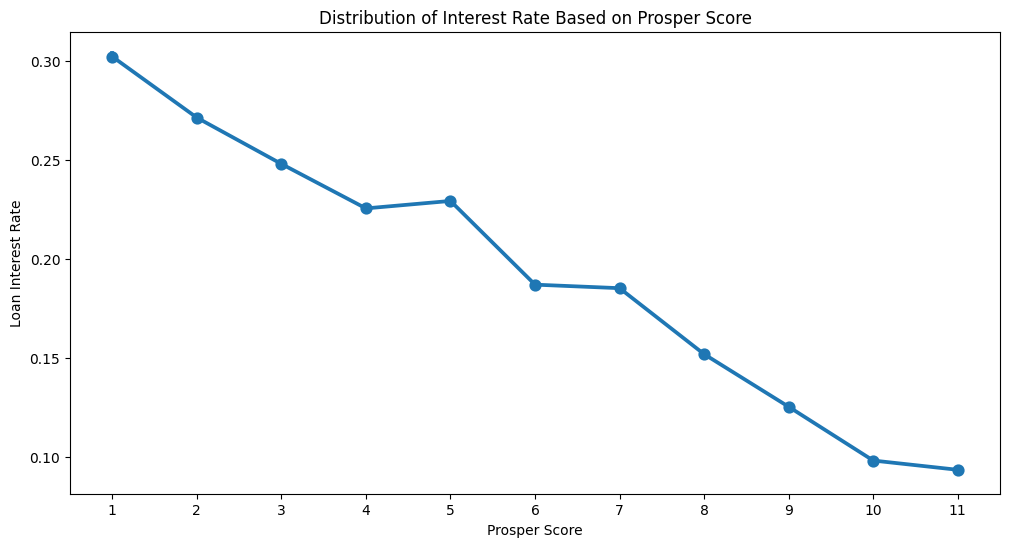

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.pointplot(y='BorrowerRate', x='ProsperScore', data=df)
plt.title('Distribution of Interest Rate Based on Prosper Score')
plt.ylabel('Loan Interest Rate')
plt.xlabel('Prosper Score')
plt.show()

A High Correlation can be observed between the Interest Rate and Borrower's Prosper Score.
Relationship: Higher Prosper Score -> Lower Interest Rate and vice-versa.

*Loan Amounts over the years ?*



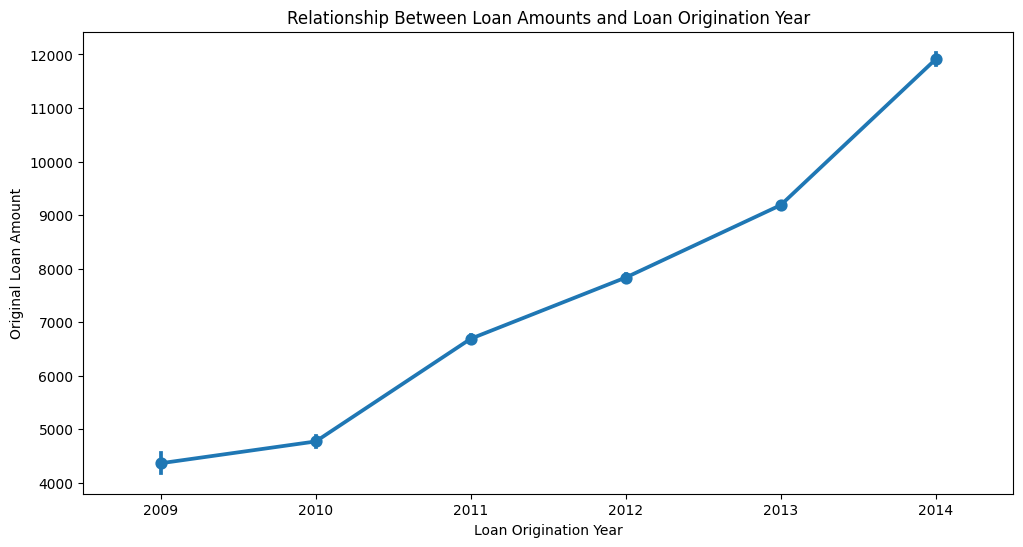

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.pointplot(y='LoanOriginalAmount', x='LoanOriginationYear',
            data=df)
plt.title('Relationship Between Loan Amounts and Loan Origination Year')
plt.ylabel('Original Loan Amount')
plt.xlabel('Loan Origination Year')
plt.show()

A Positive Trend can be observed in the Loan Amounts over the years. From the year 2009 a continuing increase has been observed in the Loan Amount being given.

*Do Higher Duration of Loans indicate Higher Loan Amounts ?*

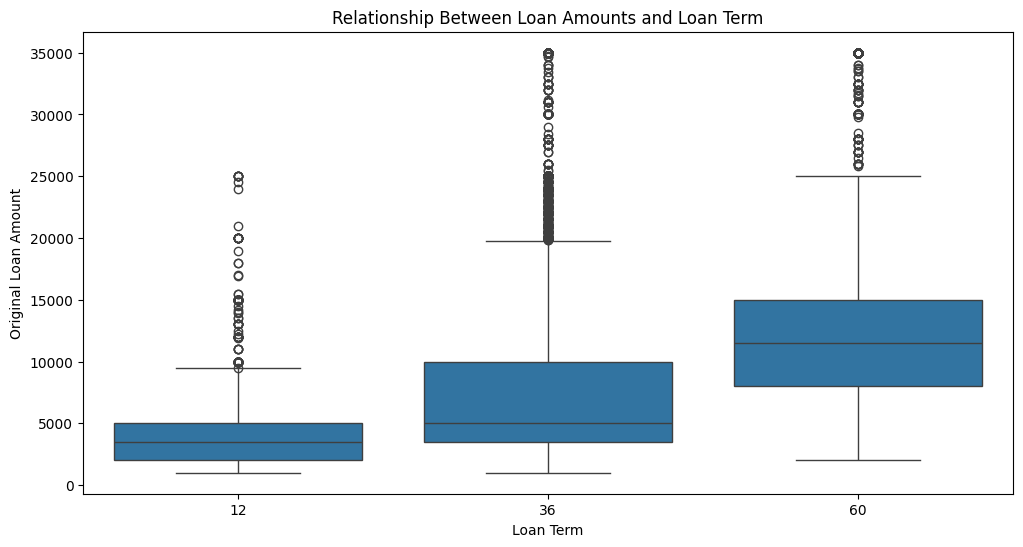

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.boxplot(y='LoanOriginalAmount', x='Term',
            data=df)
plt.title('Relationship Between Loan Amounts and Loan Term')
plt.ylabel('Original Loan Amount')
plt.xlabel('Loan Term')
plt.show()

This relation is proved to be true, it can be clearly observed that for the majority of the loans, Higher Duration Loans have a higher range of Loan Amounts.

*Investigating if Borrowers with Higher Prosper Score are more likely to pay on time ?*

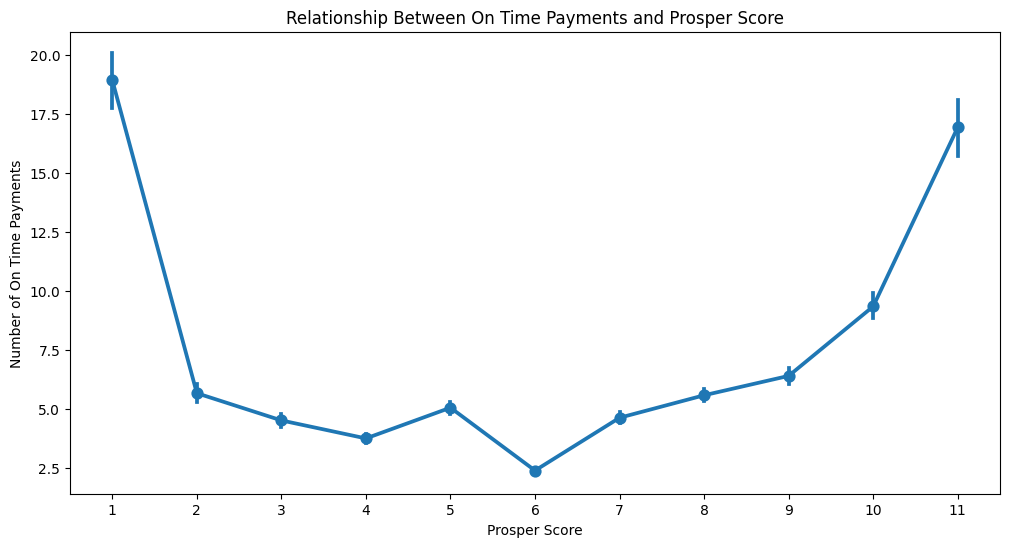

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.pointplot(y='OnTimeProsperPayments', x='ProsperScore',
            data=df)
plt.title('Relationship Between On Time Payments and Prosper Score')
plt.ylabel('Number of On Time Payments')
plt.xlabel('Prosper Score')
plt.show()

This graph is interesting since in it can be clearly seen that the Borrowers with Higher Prosper Score  have higher number of On Time Monthly Payments. This relation holds true for all Prosper Scores other than Prosper Score of 1, which can be observed as an exception to the pattern, wherein the Borrowers with this score, have lower number of On-Time payments when compared to borrowers with a Lower Prosper Score.

*Relationship between Prosper Score and Credit Score*

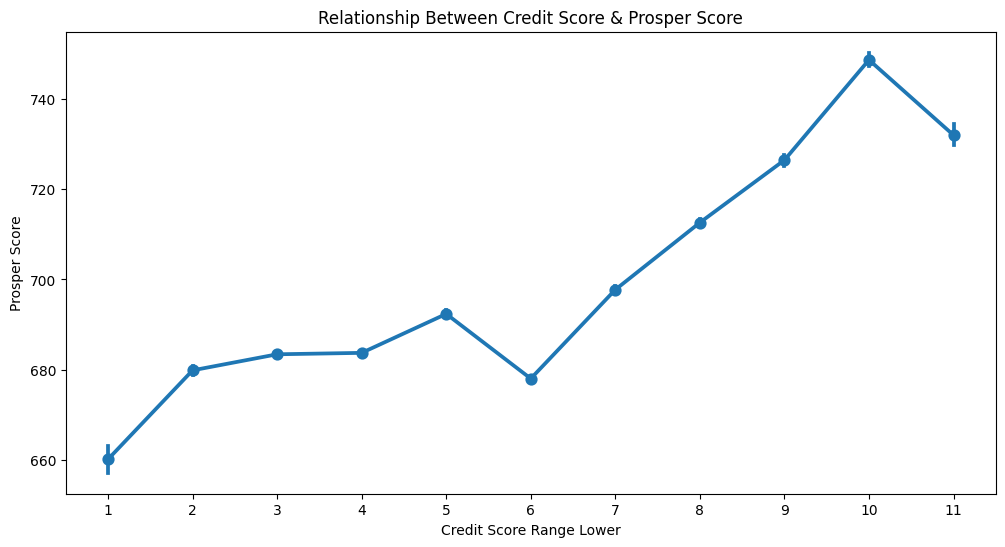

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.pointplot(y='CreditScoreRangeLower', x='ProsperScore',data=df)
plt.title('Relationship Between Credit Score & Prosper Score')
plt.ylabel('Prosper Score')
plt.xlabel('Credit Score Range Lower')
plt.show()

A Strong Relationship between Credit Score and Prosper Score can be observed. It can be seen that Higher Credit Score leads to a Higher Prosper Score.

*Do Loans given to Borrower's with Higher Score have a lower Loss ?*

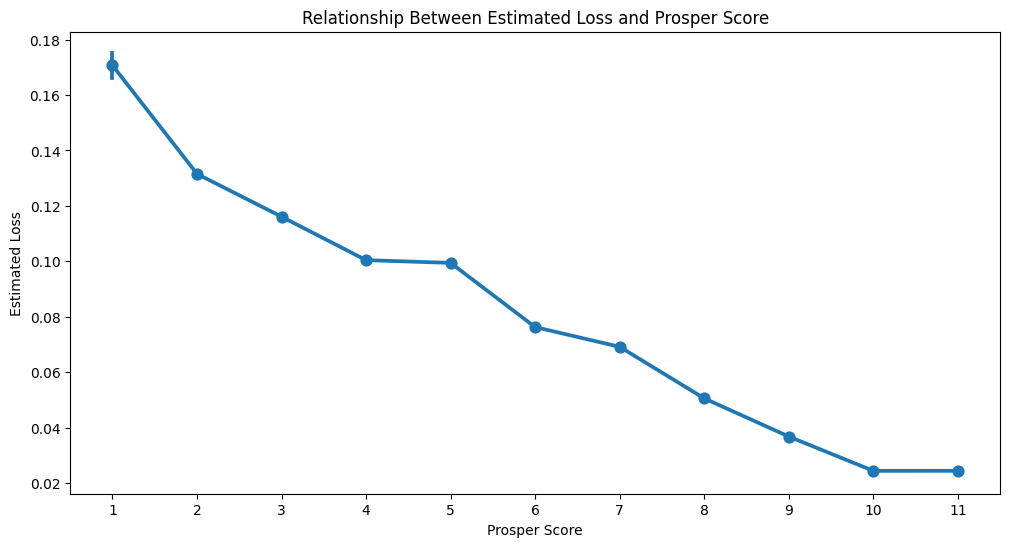

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.pointplot(x='ProsperScore', y='EstimatedLoss', data=df)
plt.title('Relationship Between Estimated Loss and Prosper Score')
plt.xlabel('Prosper Score')
plt.ylabel('Estimated Loss')
plt.show()

A Strong Negative Correlation can be seen between Estimated Loss and Prosper Score. The Loans given to Borrower's with Higher Prosper Score, have a Lower Estimated Loss.

*Loan Origianation Date vs Borrower Rate*

Text(0.5, 1.0, 'Loan Origination Year vs Borrower Rate')

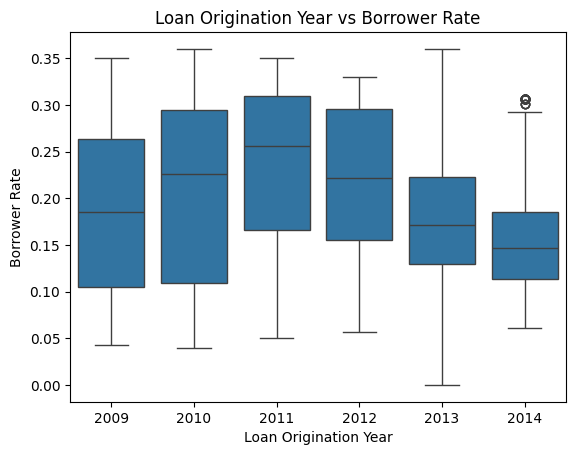

In [ ]:
sns.boxplot(data = df, x = 'LoanOriginationYear',
            y = 'BorrowerRate')
plt.xlabel('Loan Origination Year')
plt.ylabel('Borrower Rate')
plt.title('Loan Origination Year vs Borrower Rate')

Based on the data the borrower rate is seen to be increasing from 2008 to 2011 and then decrease after that.

*Distribution of Loan Status*

Text(0.5, 1.0, 'Status Count')

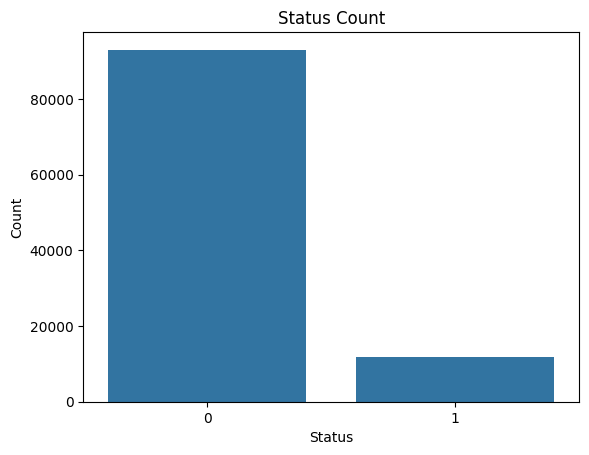

In [ ]:
sns.countplot(data = df, x = 'LoanStatus');
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Status Count')

Here 1 denotes that the borrower has defaulted and 0 means that he has not defaulted.

*Status vs Occupation*

Text(0.5, 1.0, 'Status vs Occupataion')

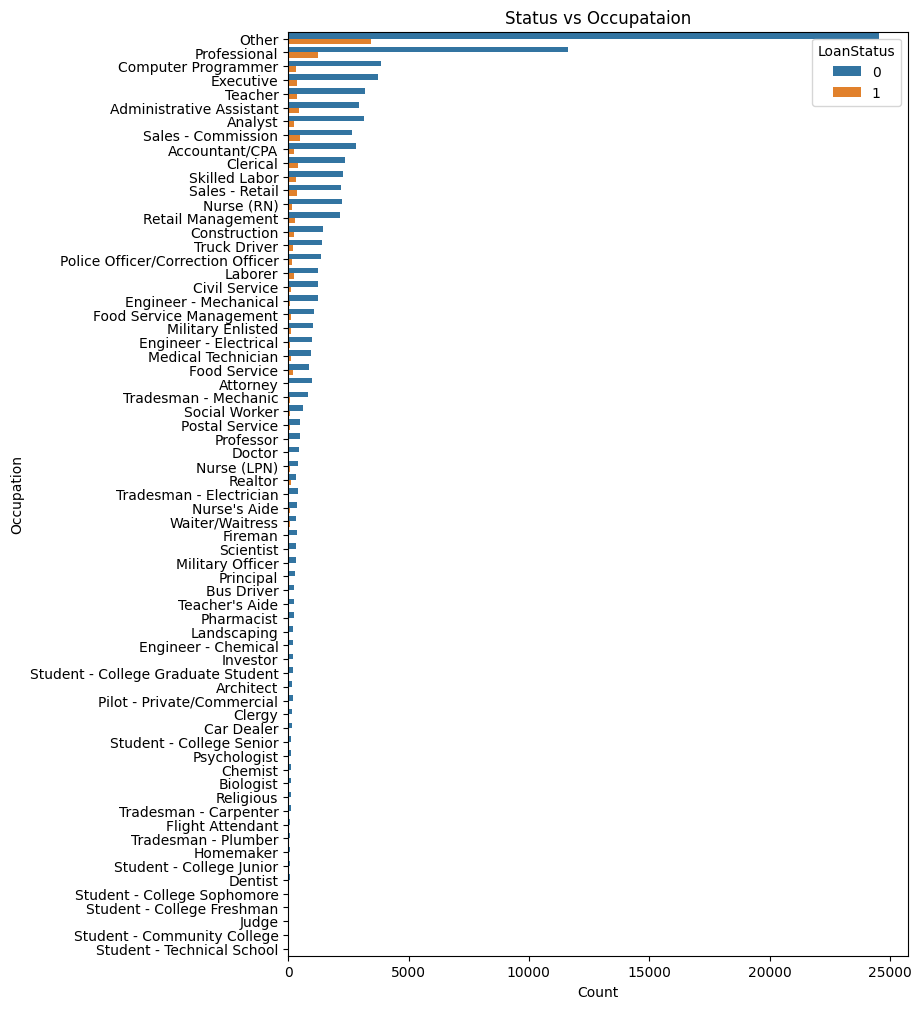

In [ ]:
order_type = df['Occupation'].value_counts().index
plt.figure(figsize=(8,12))
sns.countplot(data = df, y = 'Occupation', hue = 'LoanStatus', order = order_type);
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.title('Status vs Occupataion')

Text(0.5, 1.0, 'Status vs Occupataion')

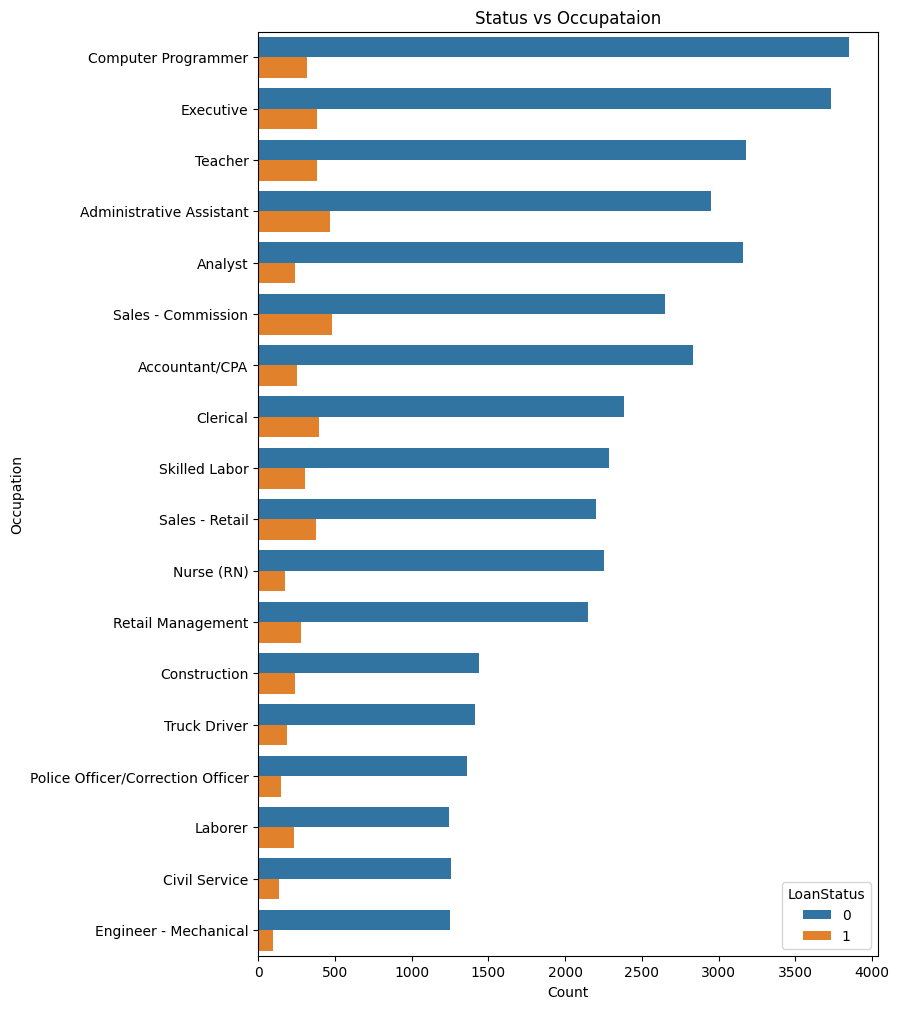

In [ ]:
order_type = df['Occupation'].value_counts().index[2:20]
plt.figure(figsize=(8,12))
sns.countplot(data = df, y = 'Occupation', hue = 'LoanStatus', order = order_type);
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.title('Status vs Occupataion')

It's difficult to determine from the first plot if any specific group defaulted the most. However, the second plot suggests that the Clerical group has a higher default rate compared to other groups.

Loan Status vs Prosper Score

Text(0.5, 1.0, 'Loan Status vs Prosper Score')

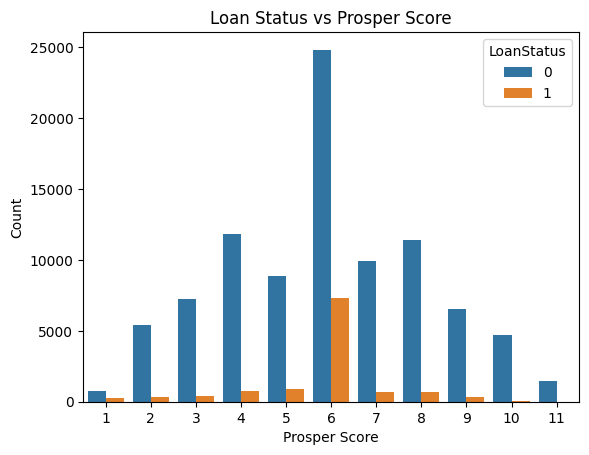

In [ ]:
sns.countplot(data = df, x = 'ProsperScore', hue = 'LoanStatus');

plt.xlabel('Prosper Score')
plt.ylabel('Count')
plt.title('Loan Status vs Prosper Score')

*Loan Status vs Borrower Rate*

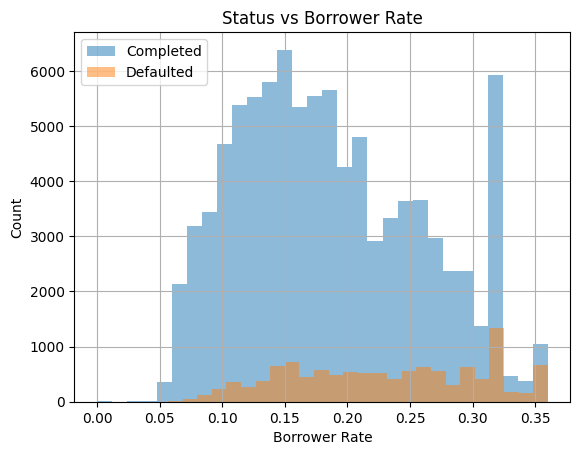

In [ ]:
# masking
completed = df['LoanStatus'] == 0
defaulted = df['LoanStatus'] == 1

df['BorrowerRate'][completed].hist(label = 'Completed', alpha = 0.5, bins = 30)
df['BorrowerRate'][defaulted].hist(label = 'Defaulted', alpha = 0.5, bins = 30)

plt.xlabel('Borrower Rate')
plt.ylabel('Count')
plt.title('Status vs Borrower Rate');
plt.legend()


Loan amounts for completed loans appear to follow a more normal distribution, with a wider spread indicating a significant range in approved loan sizes.

Defaulted loans are more concentrated towards higher loan amounts.




<Axes: xlabel='CreditScoreRangeUpper', ylabel='LoanStatus'>

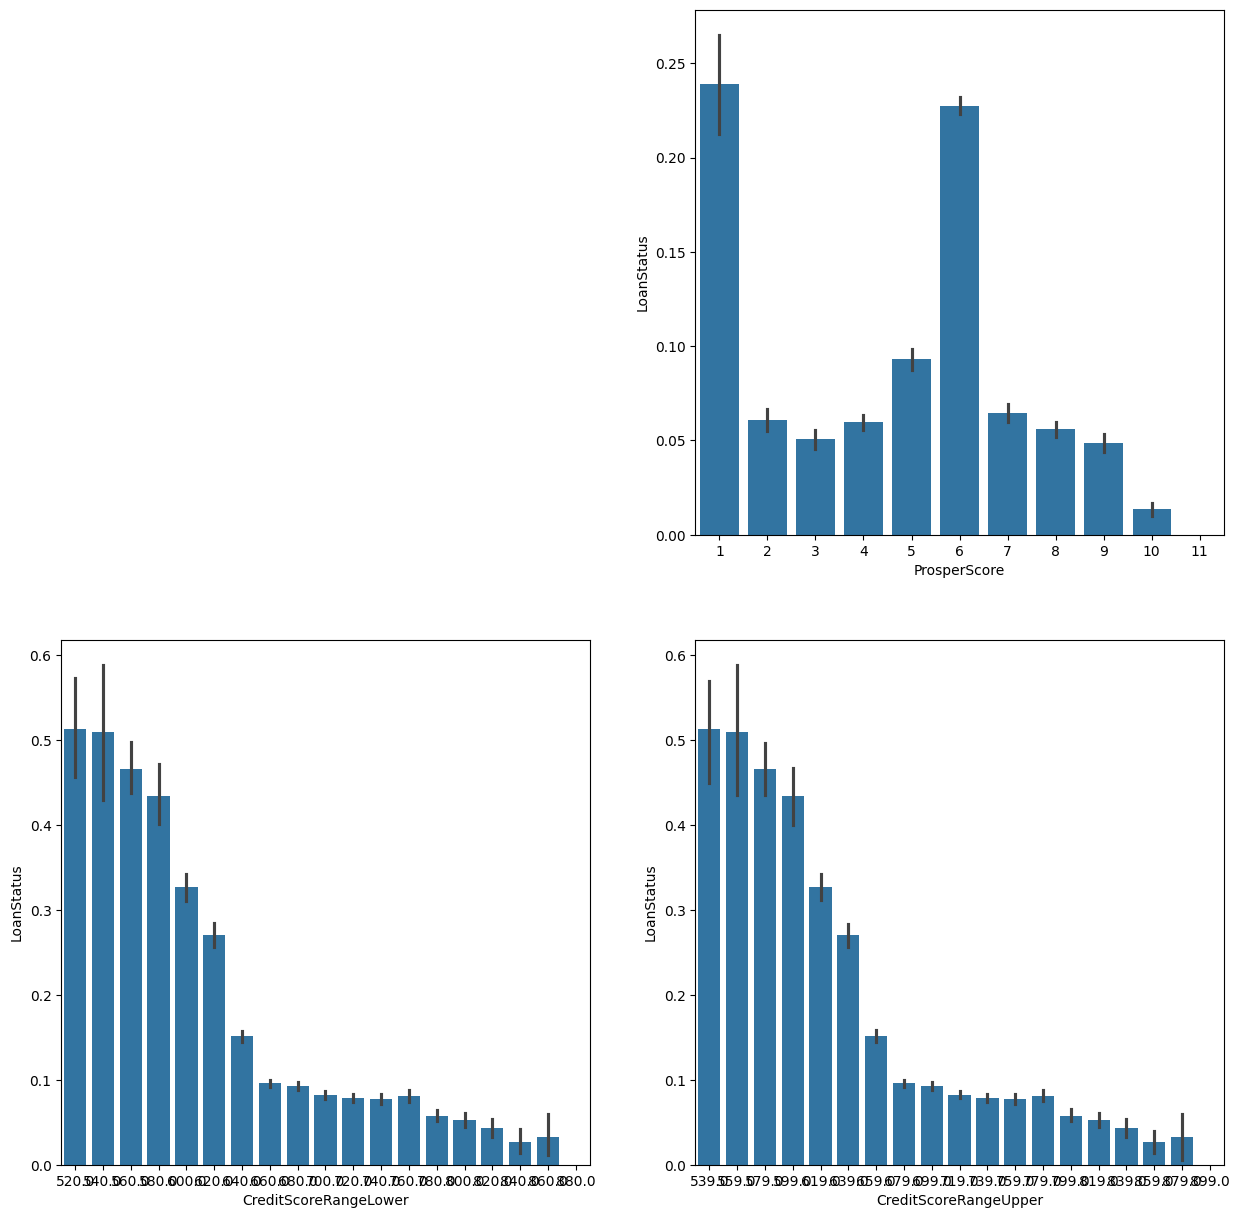

In [ ]:
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(222)
sns.barplot(x="ProsperScore", y="LoanStatus", data=df)

ax2 = fig.add_subplot(223)
sns.barplot(x="CreditScoreRangeLower", y="LoanStatus", data=df)

ax3 = fig.add_subplot(224)
sns.barplot(x="CreditScoreRangeUpper", y="LoanStatus", data=df)

Both the Prosper scores and the credit scores seem to be doing a good job of predicting default, with higher ratings defaulting less frequently (1-defaulted, 0-not defaulted, hence values closer to 0 denote lesser chances of defaulting). Interestingly, the loans with the ProsperScore of 6 default more frequently than loans rated below 6, and there is a high degree of variance in default rate for  these loans.

It should be noted here that the credit score "range" seems to be constant.

**Multi Variate Analysis**

*The Impact of Prosper Score on the Loan Amount or Monthly Payments ?*

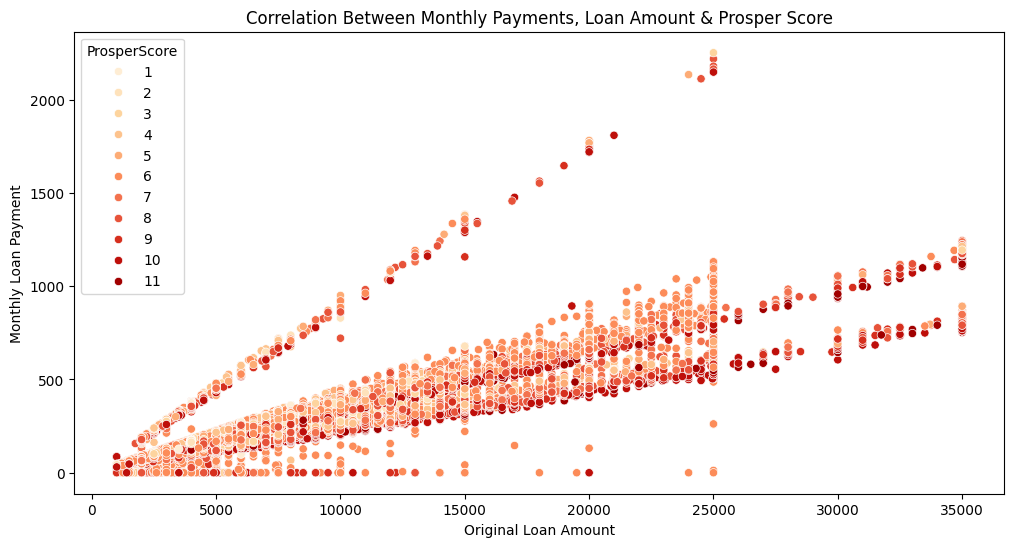

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.scatterplot(x='LoanOriginalAmount', y='MonthlyLoanPayment',
               data=df, hue='ProsperScore', palette='OrRd')
plt.title('Correlation Between Monthly Payments, Loan Amount & Prosper Score')
plt.ylabel('Monthly Loan Payment')
plt.xlabel('Original Loan Amount')
plt.show()

A relationship can be observed between Monthly Payments and Loan Amount. Higher Loan Amount leads to Higher Monthly Payments. However, no effect of Prosper Score can be seen on either, as neither does Higher Prosper Score lead to Higher Loan Amount or Monthly Amount nor vice-versa.

**Relationship Between (number of On-Time Payments and Delinquencies) and Number of Loans Taken**

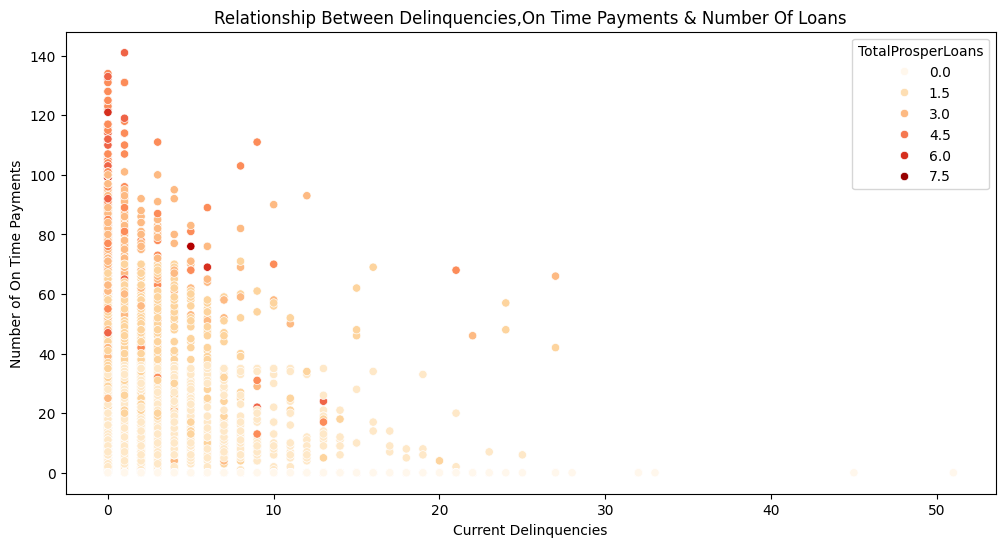

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.scatterplot(x='CurrentDelinquencies', y='OnTimeProsperPayments',
                hue='TotalProsperLoans', data=df, palette='OrRd')
plt.title('Relationship Between Delinquencies,On Time Payments & Number Of Loans')
plt.xlabel('Current Delinquencies')
plt.ylabel('Number of On Time Payments')
plt.show()

It can be seen with Borrower's having Fewer Current Delinquencies and Higher On-Time Payments, are likely to have higher number of loans when compared to borrower's with Higher Current Delinquencies and Fewer On-Time Payments.

*Relationship between Interest Rate, Yield and Estimated Loss*

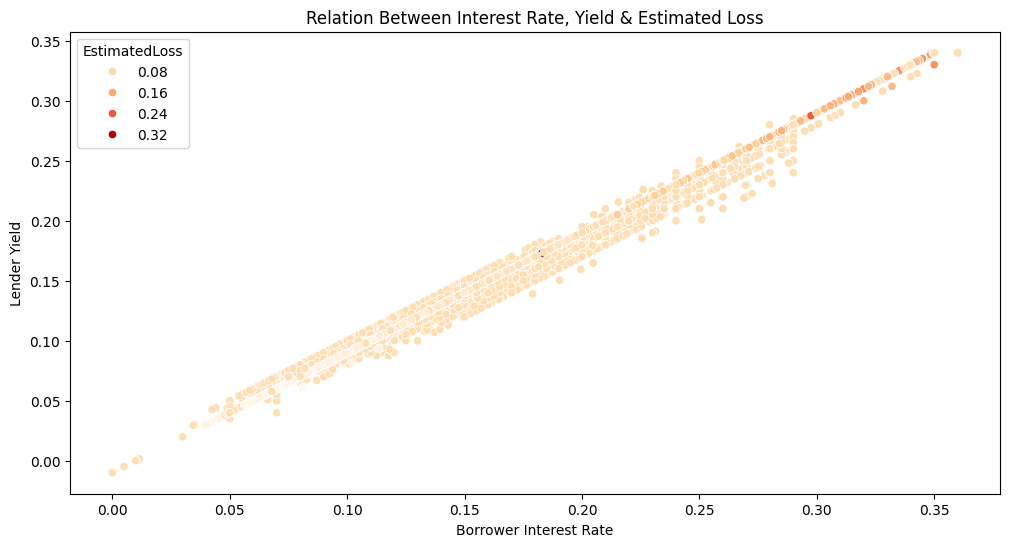

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.scatterplot(x='BorrowerRate', y='LenderYield',
                hue='EstimatedLoss', data=df,
               palette='OrRd')
plt.title('Relation Between Interest Rate, Yield & Estimated Loss')
plt.xlabel('Borrower Interest Rate')
plt.ylabel('Lender Yield')
plt.show()

It can be seen that a Strong Positive Correlation between Interest Rate and Yield. It can be seen that with the Increase in Interest, Yield and increases in the same proportion. However, the Estimated loss is uniformly distributed , with only a few higher values at higher interest rates.

**Correlation between Numeric Variables**

<Axes: >

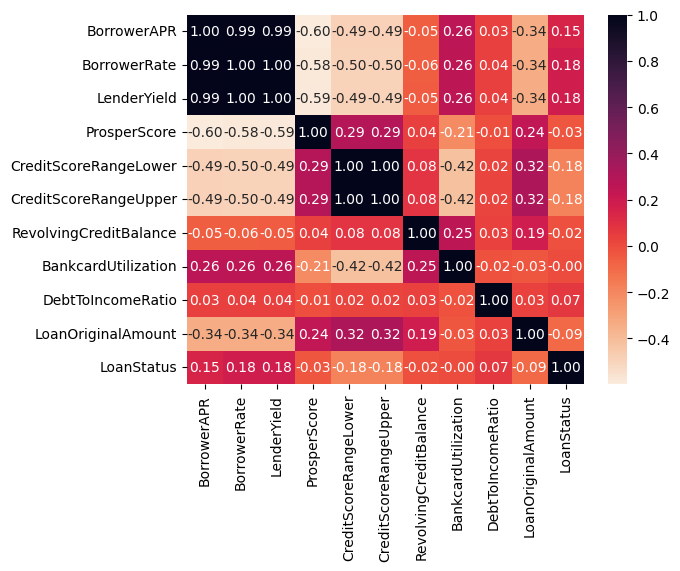

In [ ]:
heat = ['BorrowerAPR','BorrowerRate','LenderYield', 'ProsperScore', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'RevolvingCreditBalance','BankcardUtilization', 'DebtToIncomeRatio',
       'LoanOriginalAmount','LoanStatus']
sns.heatmap(df[heat].corr(), cmap = 'rocket_r', annot = True, fmt = '.2f')

Evaluate the importance of current features using techniques such as correlation analysis and feature importance scores from machine learning models.

In [ ]:
df.isnull()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,...,LoanOriginationQuarter_Q4 2011,LoanOriginationQuarter_Q4 2012,LoanOriginationQuarter_Q4 2013,ProsperRatingCombined_HR,ProsperRatingCombined_E,ProsperRatingCombined_D,ProsperRatingCombined_C,ProsperRatingCombined_B,ProsperRatingCombined_A,ProsperRatingCombined_AA
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113933,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113934,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113935,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104702 entries, 0 to 113936
Data columns (total 79 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   ListingKey                           104702 non-null  object  
 1   ListingNumber                        104702 non-null  int64   
 2   ListingCreationDate                  104702 non-null  object  
 3   Term                                 104702 non-null  int64   
 4   LoanStatus                           104702 non-null  int64   
 5   ClosedDate                           104702 non-null  object  
 6   BorrowerAPR                          104702 non-null  float64 
 7   BorrowerRate                         104702 non-null  float64 
 8   LenderYield                          104702 non-null  float64 
 9   EstimatedEffectiveYield              104702 non-null  float64 
 10  EstimatedLoss                        104702 non-null  float64 
 11  Estim

Convert categorical variables into numerical format using one-hot encoding or label encoding.

In [ ]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'IncomeRange', 'LoanOriginationQuarter', 'ProsperRatingCombined'])


Standardize numerical features to have a mean of 0 and a standard deviation of 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Standardize numerical features
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


Use PCA to reduce the dimensionality of your dataset.

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA(n_components=10)  # You can adjust the number of components as needed

# Fit and transform the data
principal_components = pca.fit_transform(df[numerical_columns])


In [ ]:
# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])


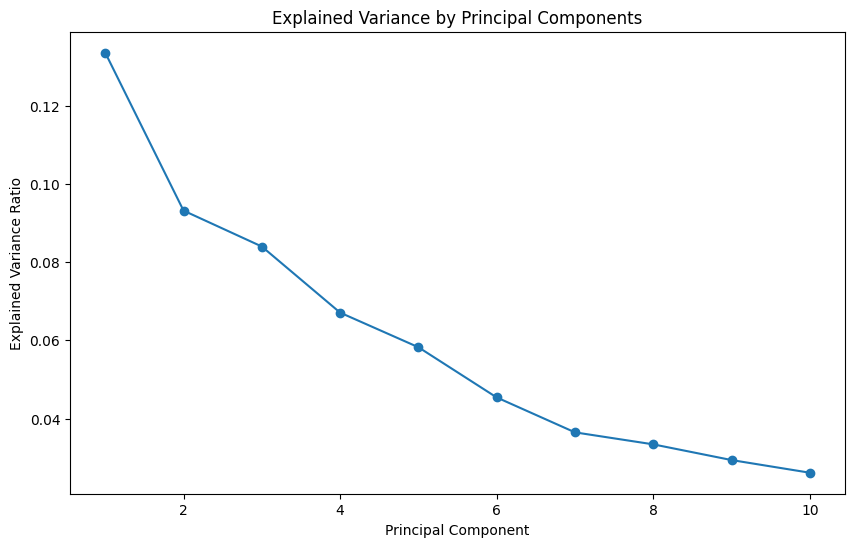

In [ ]:
import matplotlib.pyplot as plt

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.show()


In [ ]:
# Get the PCA components (loadings)
pca_components = pd.DataFrame(pca.components_, columns=numerical_columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])


In [ ]:
final_df = pd.concat([df, principal_df], axis=1)

# View the entire dataset
print(final_df.head())

                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B      -1.629103  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1       1.800656  2014-02-27 08:28:07.900000000   
3  0EF5356002482715299901A      -0.060224  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2       0.787830  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D       1.345800  2013-12-14 08:26:37.093000000   

       Term  LoanStatus           ClosedDate  BorrowerAPR  BorrowerRate  \
0 -0.487453   -0.354705  2009-08-14 00:00:00    -0.672337     -0.454869   
1 -0.487453   -0.354705              Unknown    -1.230415     -1.337716   
3 -0.487453   -0.354705              Unknown    -1.166918     -1.265483   
4 -0.487453   -0.354705              Unknown     0.331956      0.220642   
5  1.738335   -0.354705              Unknown    -0.807640     -0.810683   

   LenderYield  EstimatedEffectiveYield  ...       PC1       PC2       PC3  \
0    -0.589321

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Define the columns to be scaled
columns_to_scale = ['BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
                     'EstimatedReturn', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines',
                     'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
                     'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
                     'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
                     'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance',
                     'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades',
                     'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'DebtToIncomeRatio',
                     'StatedMonthlyIncome', 'TotalProsperLoans', 'TotalProsperPaymentsBilled',
                     'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate',
                     'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding',
                     'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber',
                     'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginalAmount', 'MonthlyLoanPayment',
                     'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees',
                     'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
                     'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations',
                     'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount', 'Investors']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the selected columns
final_df[columns_to_scale] = scaler.fit_transform(final_df[columns_to_scale])

# Check the scaled DataFrame
print(final_df.head())


                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B      -1.629103  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1       1.800656  2014-02-27 08:28:07.900000000   
3  0EF5356002482715299901A      -0.060224  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2       0.787830  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D       1.345800  2013-12-14 08:26:37.093000000   

       Term  LoanStatus           ClosedDate  BorrowerAPR  BorrowerRate  \
0 -0.487453   -0.354705  2009-08-14 00:00:00    -0.672337     -0.454869   
1 -0.487453   -0.354705              Unknown    -1.230415     -1.337716   
3 -0.487453   -0.354705              Unknown    -1.166918     -1.265483   
4 -0.487453   -0.354705              Unknown     0.331956      0.220642   
5  1.738335   -0.354705              Unknown    -0.807640     -0.810683   

   LenderYield  EstimatedEffectiveYield  ...       PC1       PC2       PC3  \
0    -0.589321

using SelectKBest with the f_classif scoring function:

In [ ]:
non_numeric_columns = final_df.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)

Index(['ListingKey', 'ListingCreationDate', 'ClosedDate',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'FirstRecordedCreditLine', 'IncomeVerifiable',
       'LoanKey',
       ...
       'LoanOriginationQuarter_Q4 2011', 'LoanOriginationQuarter_Q4 2012',
       'LoanOriginationQuarter_Q4 2013', 'ProsperRatingCombined_HR',
       'ProsperRatingCombined_E', 'ProsperRatingCombined_D',
       'ProsperRatingCombined_C', 'ProsperRatingCombined_B',
       'ProsperRatingCombined_A', 'ProsperRatingCombined_AA'],
      dtype='object', length=211)


There is a negative correlation between Prosper Score, Borrower APR and Lender Yield respectively.


**Dataset**
The dataset contains data about the details of the various loans lent to the borrowers from Prosper. Each row in the dataset represents a loan, uniquely identified by the Listing Key.
Every row in the dataset describes various attributes about the Borrower such as Employment Status, Credit Score, etc. Every row also describes other parameters such as Monthly Payments, On Time Payments, Interest Rate, etc.

**Summary of Findings**
The exploration of the dataset led to the discovery of the various attributes about the Borrower's in the Prosper Loan dataset:

Califoria is the state with the Highest Number of Borrowers.


1. Highest number of the loans taken by the Borrowers have been categorised as Debt Consolidation.
2. The number of Borrowers who Own & Dont Own a Home are almost evenly distributed in the dataset.
3. Majority of the portion of Borrowers are Employed.
4. Majority of the Borrowers have an income between 3000 - 6000.
5. Majority of the Borrowers have a Credit Score between 650 - 750.
6. Most of the Borrowers have Prosper Scores between 4 - 8, with the 7. 7. Most Commonly occurring Prosper Score being 4.
8. Most of the loans are given for a period of 36 Months/3 Years.
9. The exploration also enabled in the discovery of many correlations between the attributes of Loans, such as the Interest Rate, Monthly Payments, Loan Origination Year and On Time Payments and the Borrower's attributes such as Employment Status. The following are some of the findings:

1. The number of Loans have doubled in number from the previous years from 2010 - 2013, with the most loans being issued in the year 2013.


The exploration of the dataset, led to the identification of some interesting dependencies between the Borrower's Attributues and Loan Attributes. These include -

1. Borrowers with Higher Monthly Income are assigned a Higher Prosper Score.
2. Borrowers with Prosper Score higher than or equal to 8, are more likely to own a home, when compared to those with score less than or equal to 7.
3. Employed Borrowers take loans of Higher Amounts when compared to Borrower's who are Retired or Unemployed.
4. Unemployed Borrowers are charged a Higher Interest Rate in comparison to Employed and Retired Borrowers.
5. Employed Borrowers are assigned a Higher Prosper Score.
6. The Interest Rate is Negatively Correlated with Prosper Score. Higher Prosper Score leads to Lower Interest Rates.
7. The Loan Amounts given has constantly increased over the years.
8. Higher Loan Amount also leads to a Higher Loan Term.
9. The Prosper Score is Positively Correlated with On-Time Monthly Payments. The borrowers with Higher Prosper Scores are more likely to make On-Time Monthly Payments.
10. A Higher Credit Score leads to a Higher Prosper Score.
11. The Estimated Loss reduces with an increase in the Borrowers Prosper Score.
12. Borrowers who have Fewer Current Delinquencies and Higher On-Time Payments, are more likely to have Higher Number of Loans.
13. The Estimated Loss increase with the increase in Interest Rate and Yield.